## I&I

In [1]:
from utils import *
from matplotlib import pyplot as plt
import json
%matplotlib inline

In [2]:
# load data from key file

In [3]:
key_df = pd.read_csv("/home/gidi/nbs/RoadTrackACC/data/RoadTrack_Experiment_log - Acc_Data.csv")

In [4]:
%load_ext autoreload
% autoreload 2

In [39]:
f=glob.glob('data/*.xlsx')
f

['data/Acc_Data_Tow_1605.xlsx',
 'data/Acc_Data_0805 .xlsx',
 'data/Acc_Data_0205.xlsx',
 'data/Acc_Data_Toyota_2604.xlsx',
 'data/Acc_Test_240418.xlsx',
 'data/Acc_Data_Tow_1005.xlsx',
 'data/BUMPERS.xlsx',
 'data/Acc_Data_0305.xlsx']

['data/Acc_Data_Tow_1605.xlsx']
Acc_Data_Tow_1605.xlsx Tow_Chevrolet1
Acc_Data_Tow_1605.xlsx Tow_Chevrolet2
Acc_Data_Tow_1605.xlsx Tow_Chevrolet3
Acc_Data_Tow_1605.xlsx Tow_Chevrolet1_Back
Acc_Data_Tow_1605.xlsx Tow_Chevrolet2_Back
Acc_Data_Tow_1605.xlsx Tow_Chevrolet3_Back
Acc_Data_Tow_1605.xlsx Tow_Nissan1
Acc_Data_Tow_1605.xlsx Tow_Nissan2
Acc_Data_Tow_1605.xlsx Tow_Nissan3
Acc_Data_Tow_1605.xlsx Tow_Nissan1_Back
Acc_Data_Tow_1605.xlsx Tow_Nissan2_Back
Acc_Data_Tow_1605.xlsx Tow_Nissan3_Back
Acc_Data_Tow_1605.xlsx Tow_Toyota1
Acc_Data_Tow_1605.xlsx Tow_Toyota2
Acc_Data_Tow_1605.xlsx Tow_Toyota3
Acc_Data_Tow_1605.xlsx Tow_Toyota1_Back
Acc_Data_Tow_1605.xlsx Tow_Toyota2_Back
Acc_Data_Tow_1605.xlsx Tow_Toyota3_Back


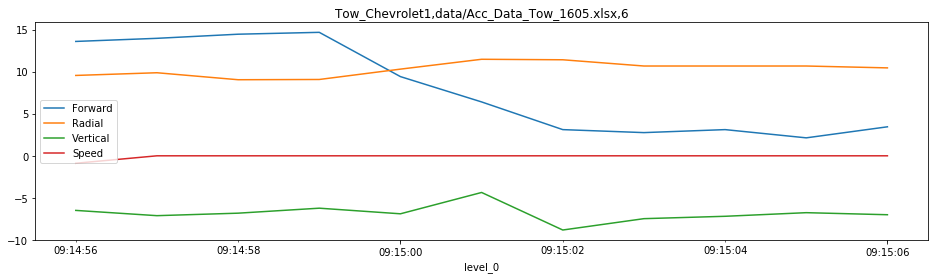

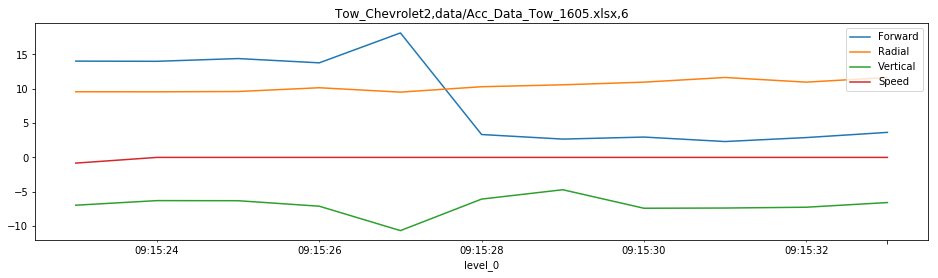

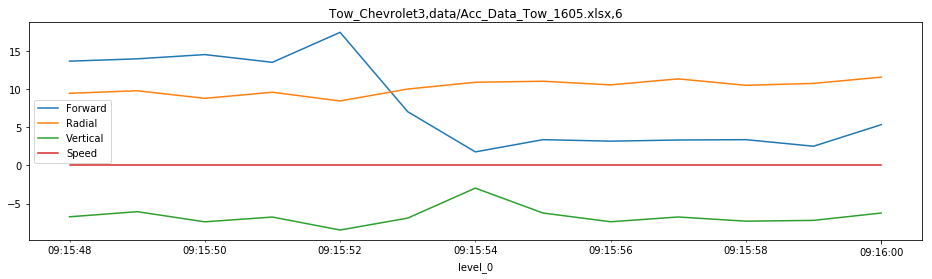

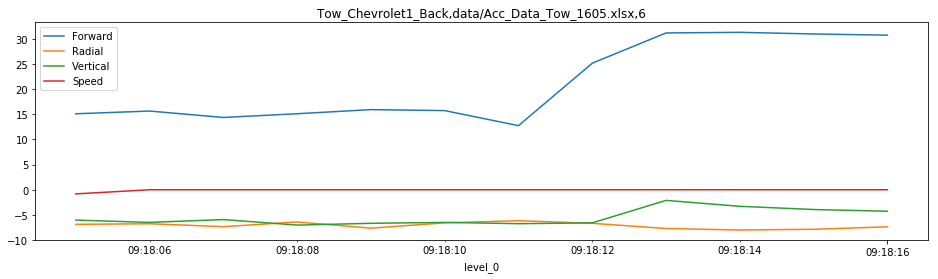

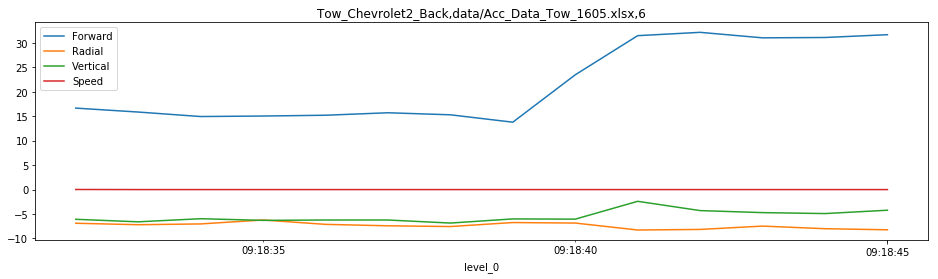

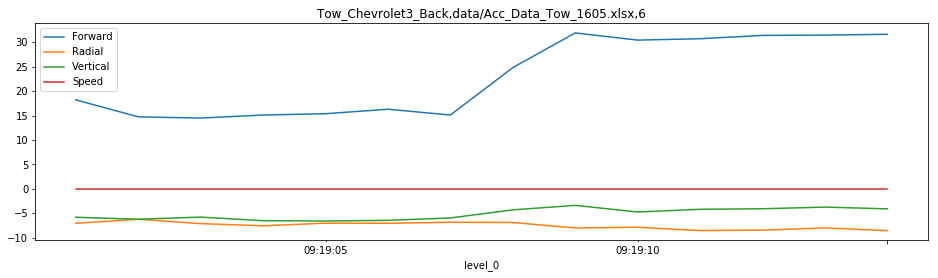

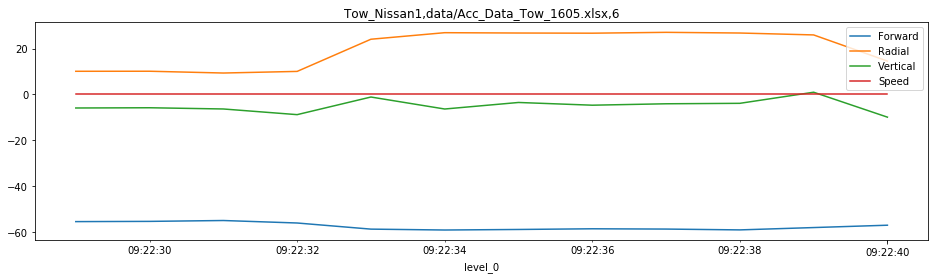

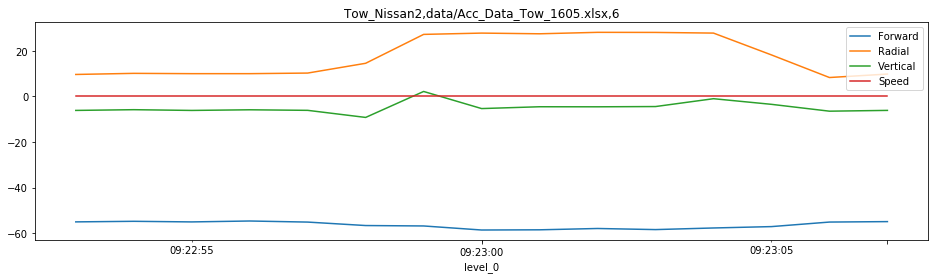

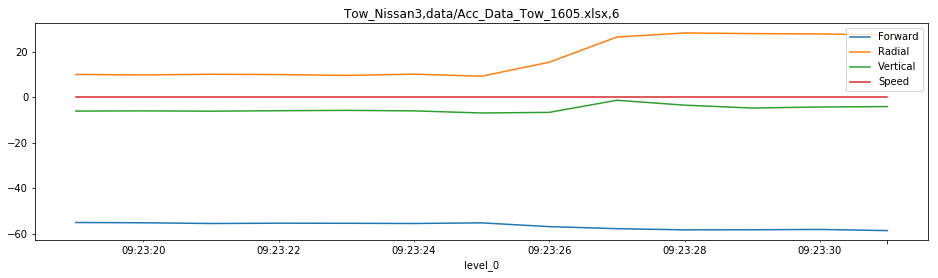

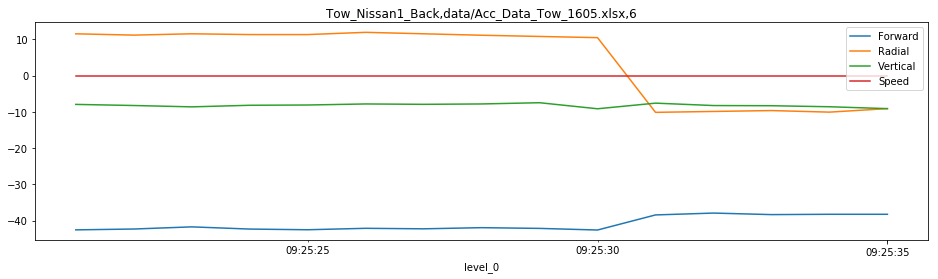

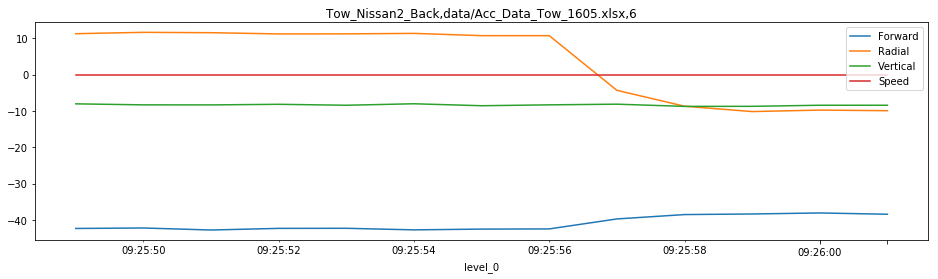

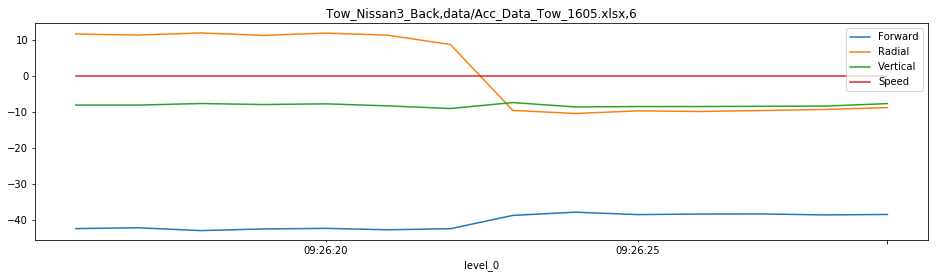

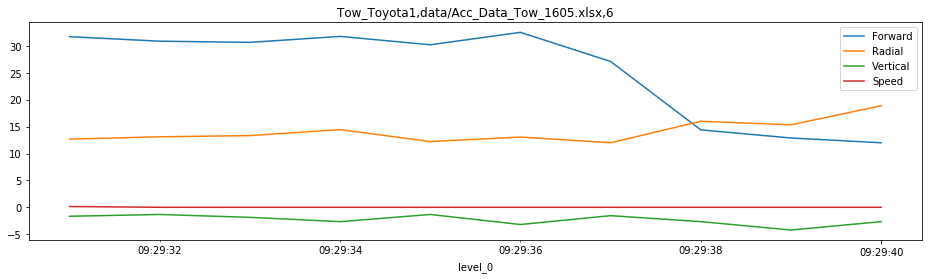

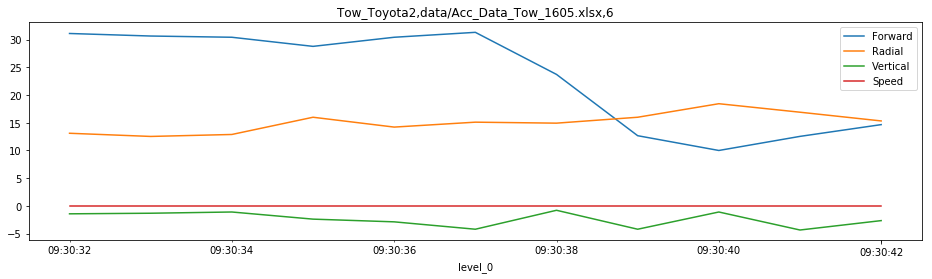

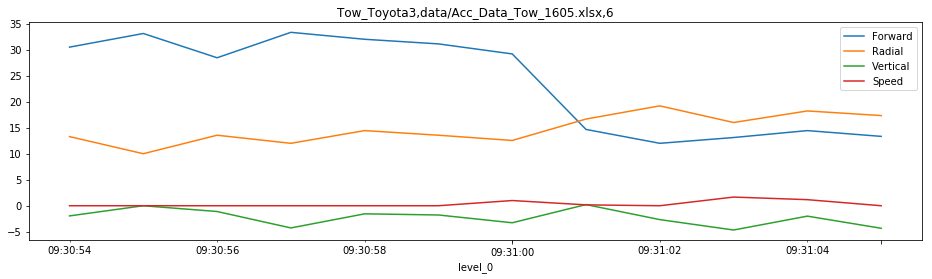

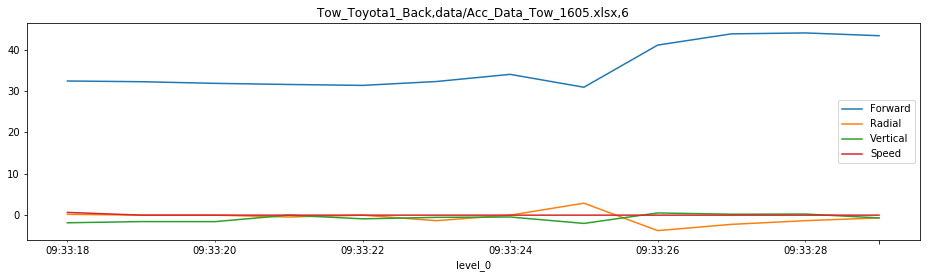

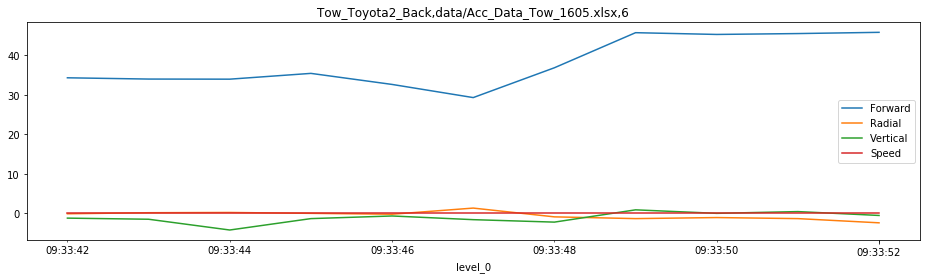

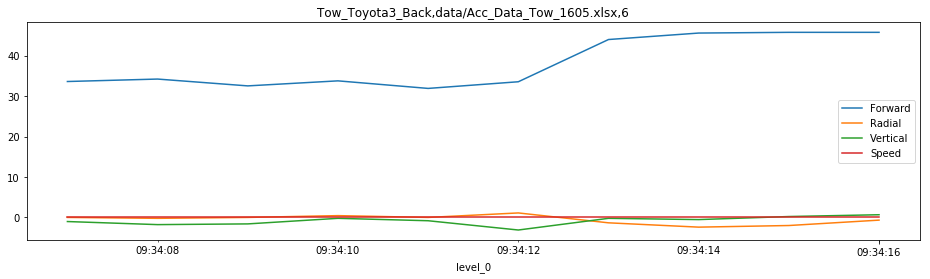

In [45]:
e =DataLoader()
e.load_data(['data/Acc_Data_Tow_1605.xlsx'])

['data/Acc_Data_Tow_1005.xlsx']
Acc_Data_Tow_1005.xlsx Tow_Chevrolet1
Acc_Data_Tow_1005.xlsx Tow_Chevrolet2
Acc_Data_Tow_1005.xlsx Tow_Chevrolet3
Acc_Data_Tow_1005.xlsx Tow_Chevrolet1_Back
Acc_Data_Tow_1005.xlsx Tow_Chevrolet2_Back
Acc_Data_Tow_1005.xlsx Tow_Chevrolet3_Back
Acc_Data_Tow_1005.xlsx Tow_Nissan1
Acc_Data_Tow_1005.xlsx Tow_Nissan2
Acc_Data_Tow_1005.xlsx Tow_Nissan3
Acc_Data_Tow_1005.xlsx Tow_Nissan1_Back
Acc_Data_Tow_1005.xlsx Tow_Nissan2_Back
Acc_Data_Tow_1005.xlsx Tow_Nissan3_Back
Acc_Data_Tow_1005.xlsx Tow_Toyota1
Acc_Data_Tow_1005.xlsx Tow_Toyota2
Acc_Data_Tow_1005.xlsx Tow_Toyota3
Acc_Data_Tow_1005.xlsx Tow_Toyota1_Back
Acc_Data_Tow_1005.xlsx Tow_Toyota2_Back
Acc_Data_Tow_1005.xlsx Tow_Toyota3_Back
Acc_Data_Tow_1005.xlsx Chevrolet_IgnitionOff_standing
error in sheet above
Acc_Data_Tow_1005.xlsx Toyota_IgnitionOff_standing
error in sheet above
Acc_Data_Tow_1005.xlsx Nissan_IgnitionOff_Standing


/home/gidi/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


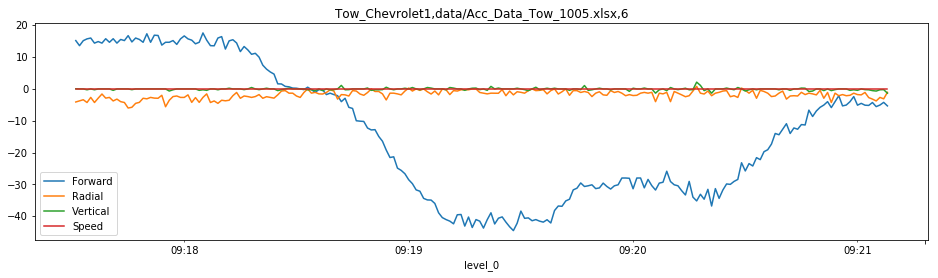

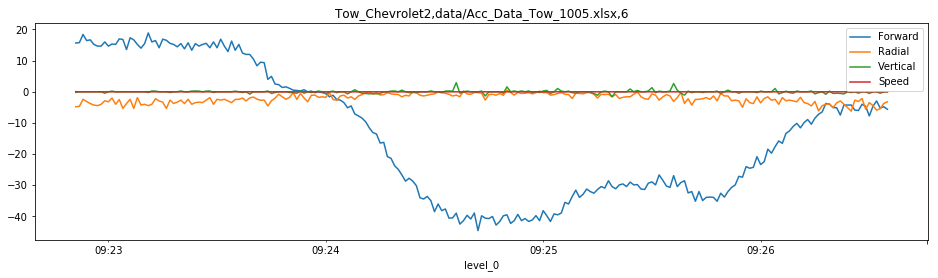

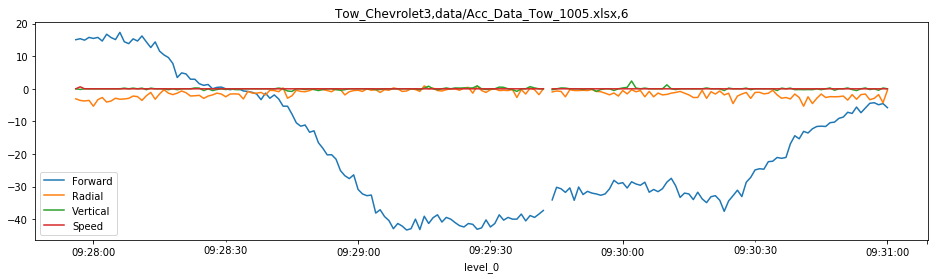

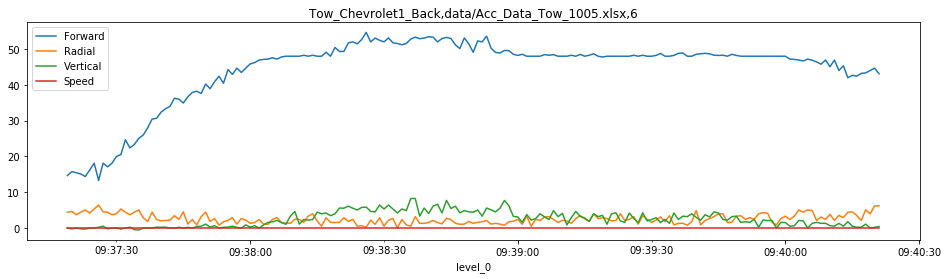

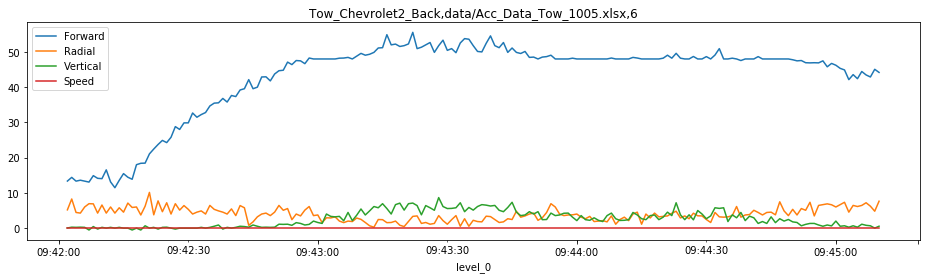

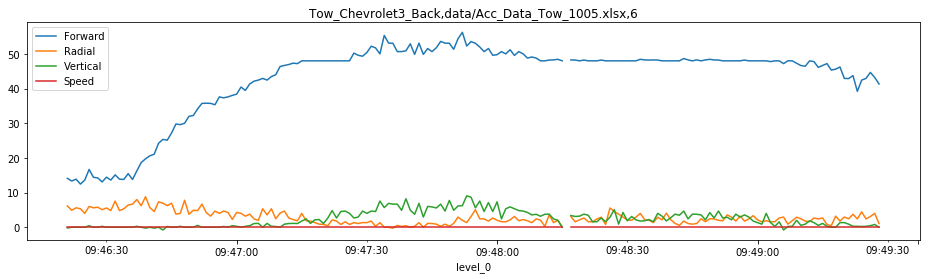

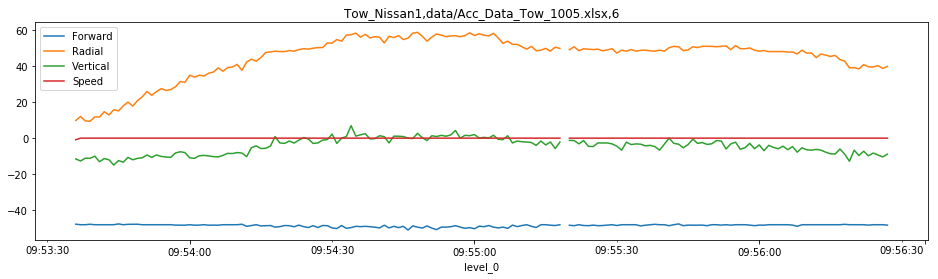

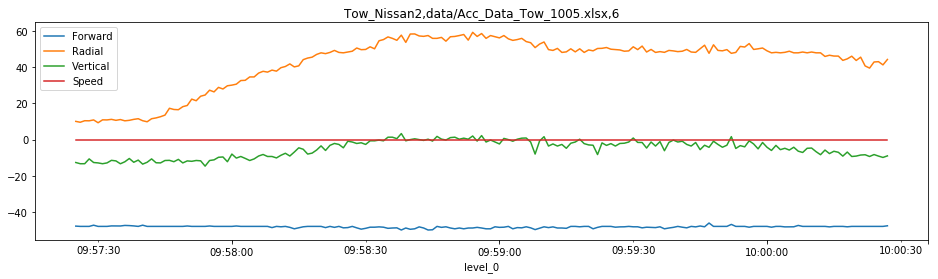

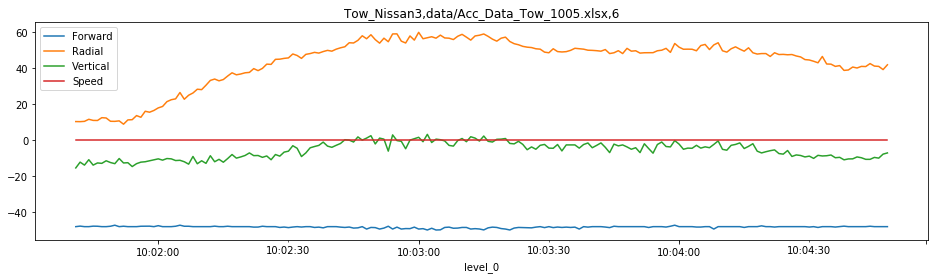

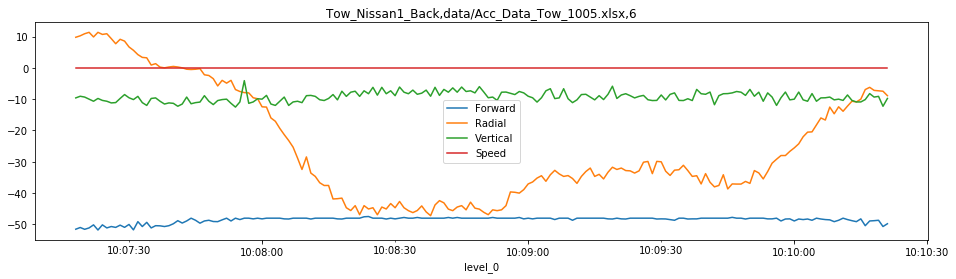

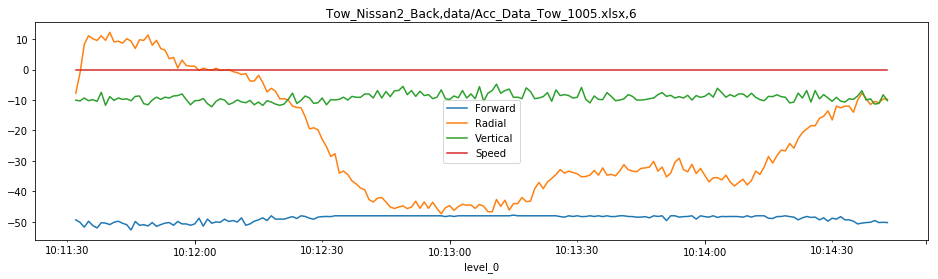

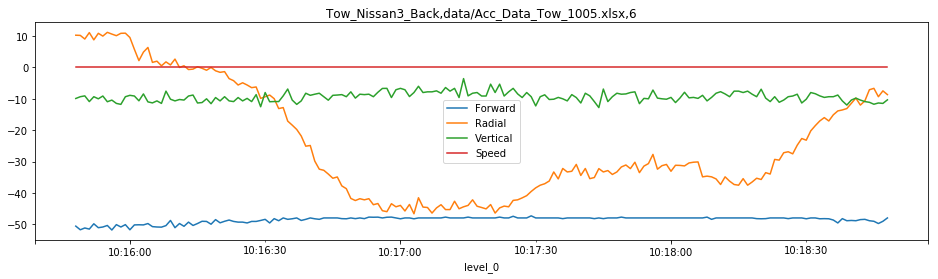

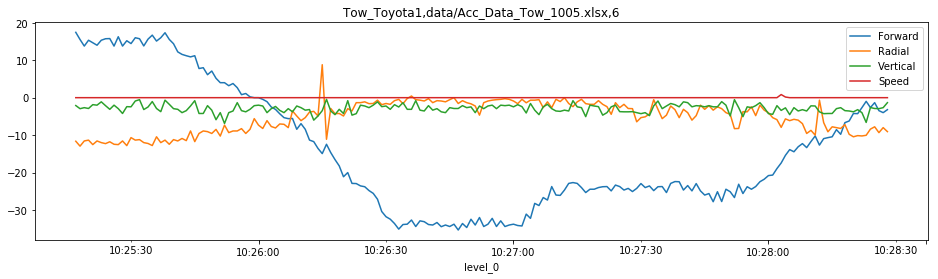

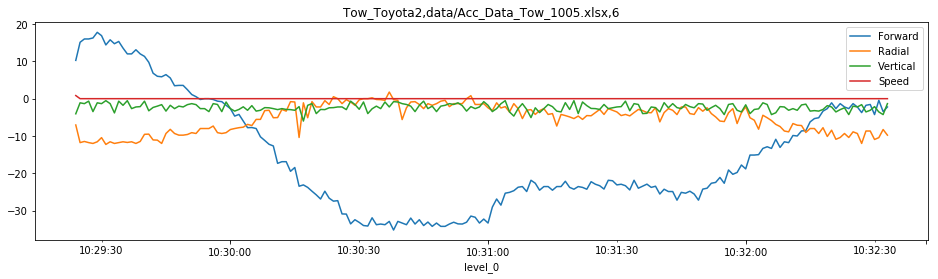

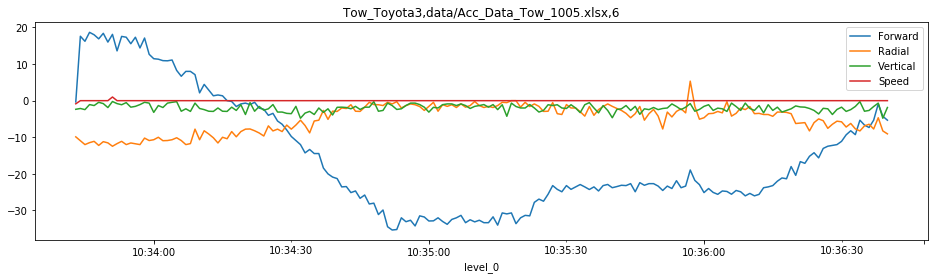

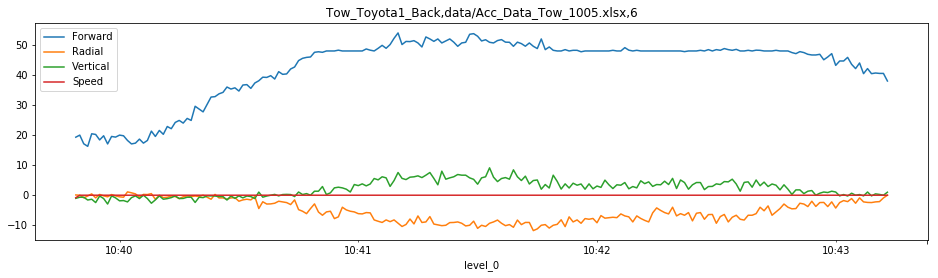

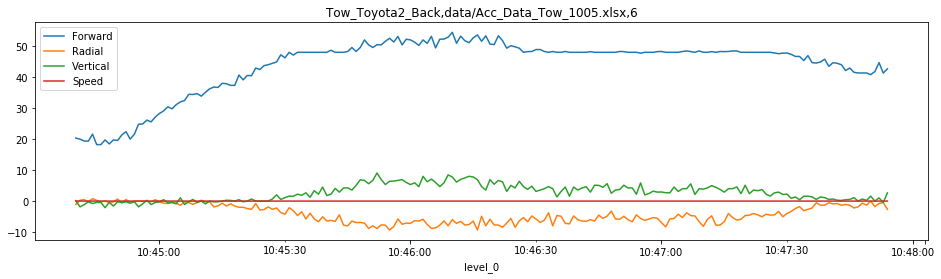

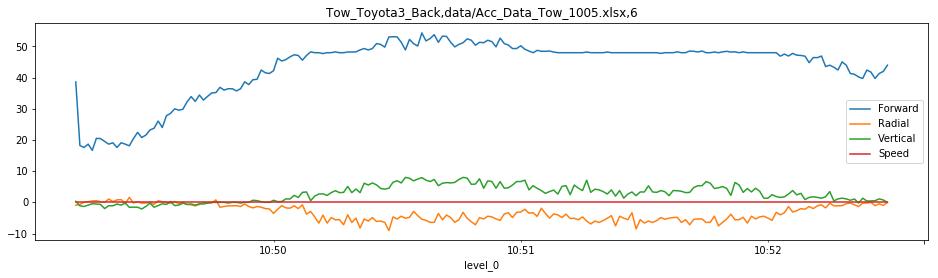

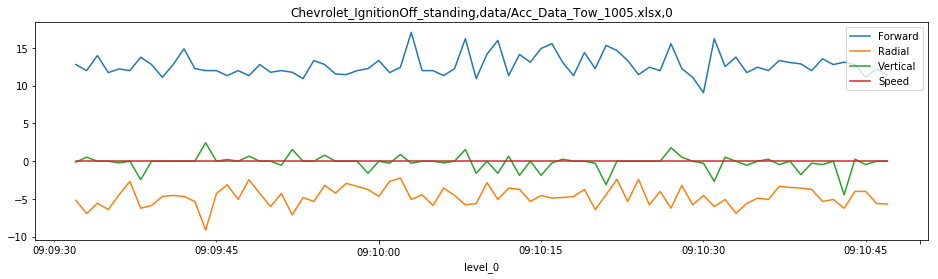

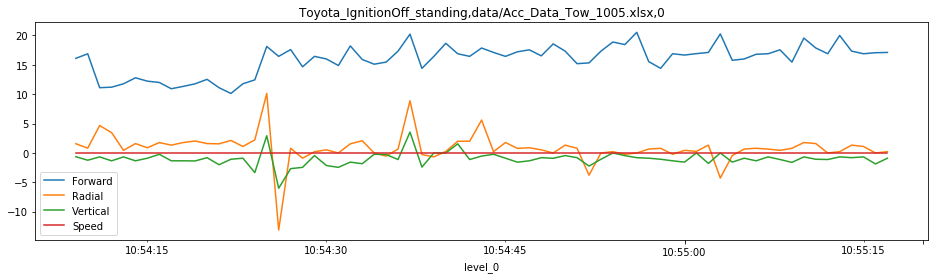

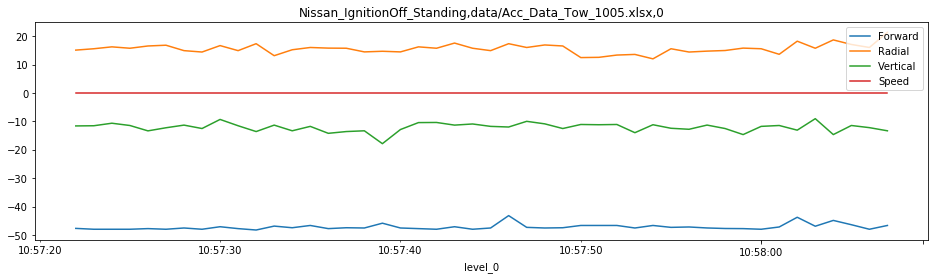

In [11]:
# load the sheets from following files
d.load_data(['data/Acc_Data_Tow_1005.xlsx'])
big_df = d.big_df

In [76]:
config = json.load(codecs.open('config.json', 'r', 'utf-8-sig'))

In [77]:
key_df = pd.read_csv(config['experiment_key_file'])

## Analysis

### Tests

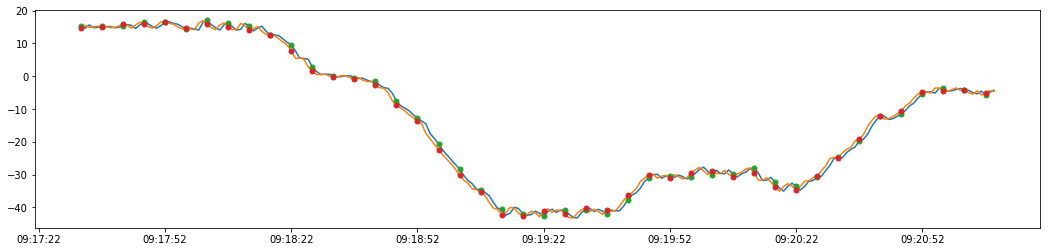

In [288]:
fig,ax = plt.subplots(figsize=(18,4))
ax.plot(grouped_list[0].Forward)
ax.plot(grouped_list[0].Forward[::5],marker='.', linestyle='None', markersize = 10.0)

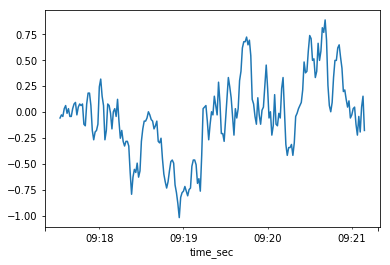

In [216]:
tmp = grouped_list[0].Forward['first']
pd.Series(np.gradient(tmp.values,2), tmp.index, name='slope').plot()

/home/gidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=24,min_periods=0,adjust=True,ignore_na=False).mean()
  


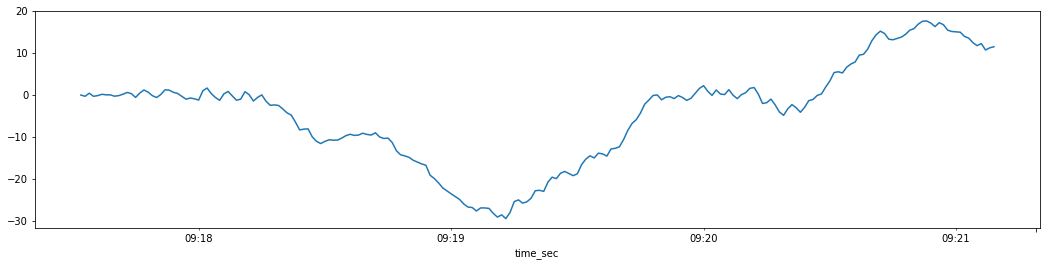

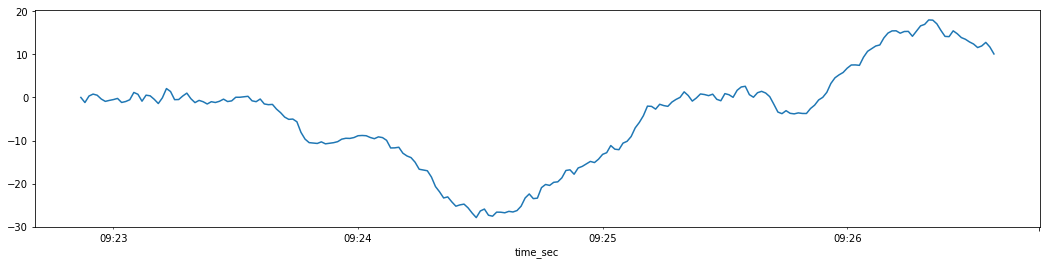

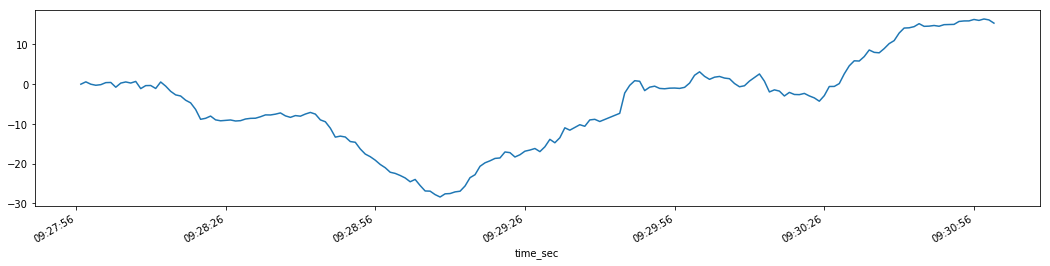

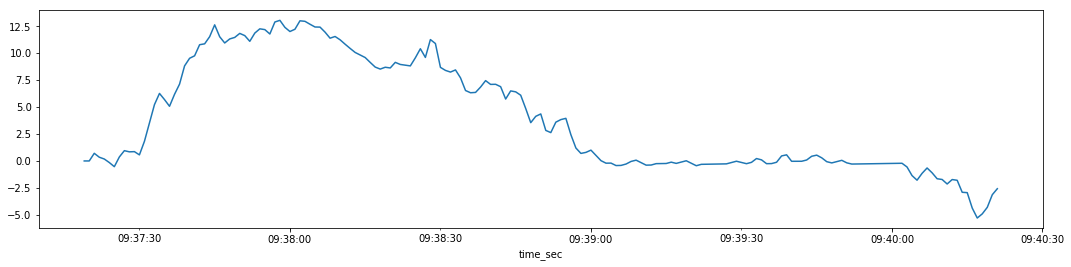

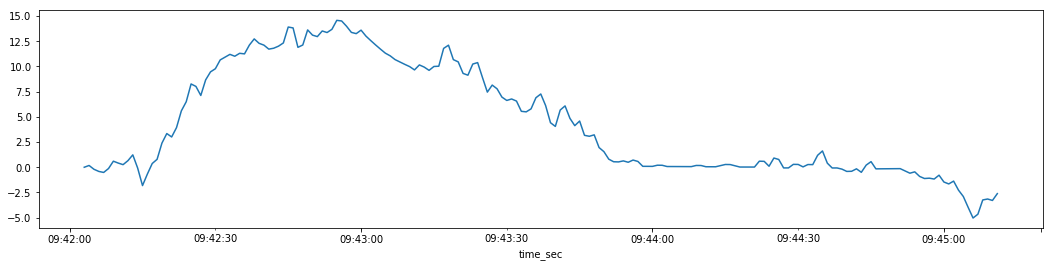

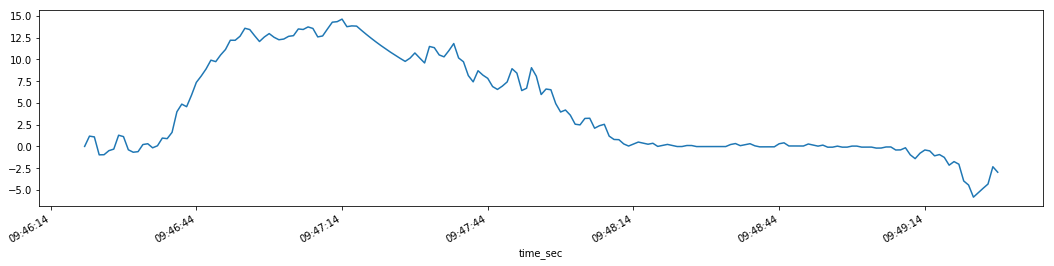

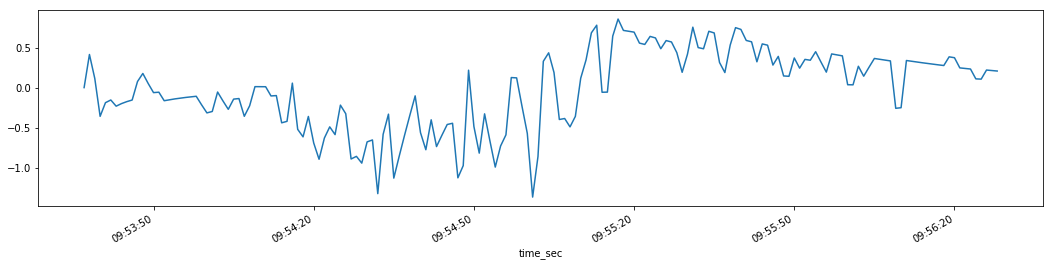

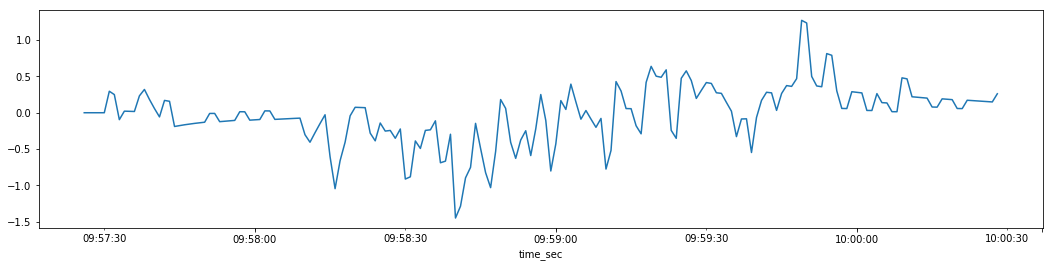

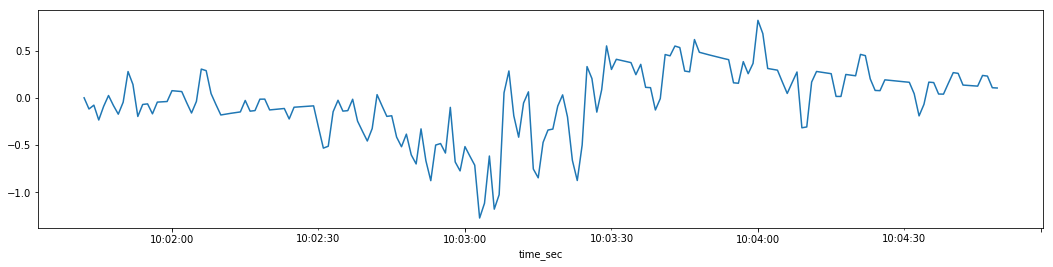

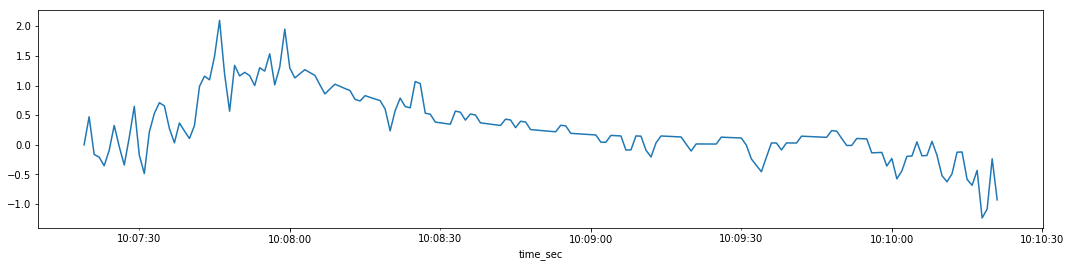

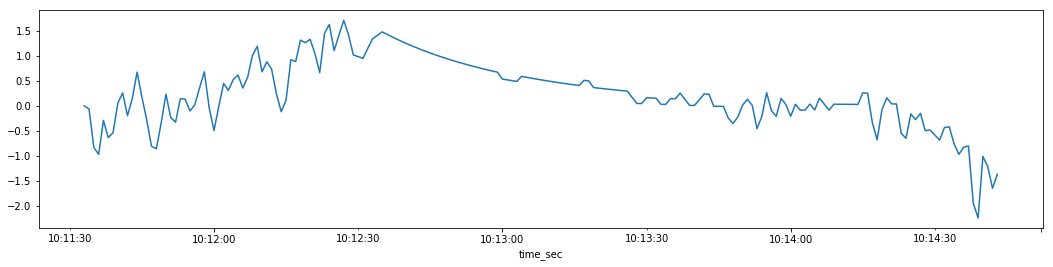

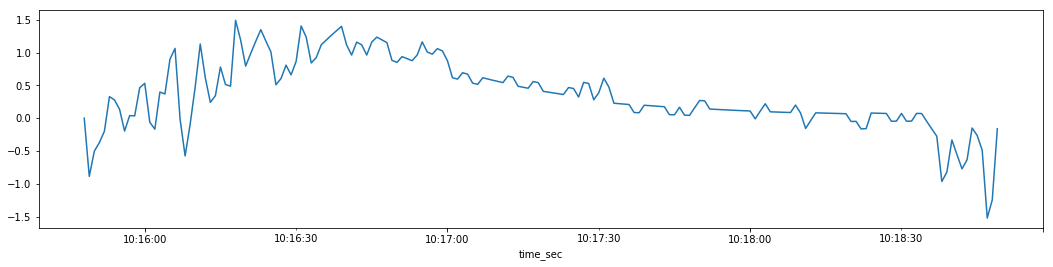

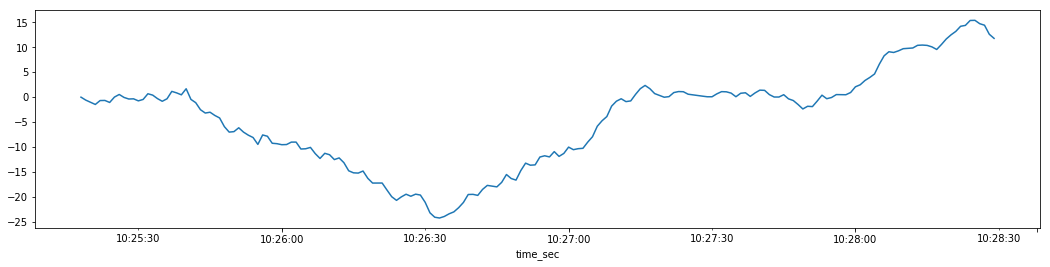

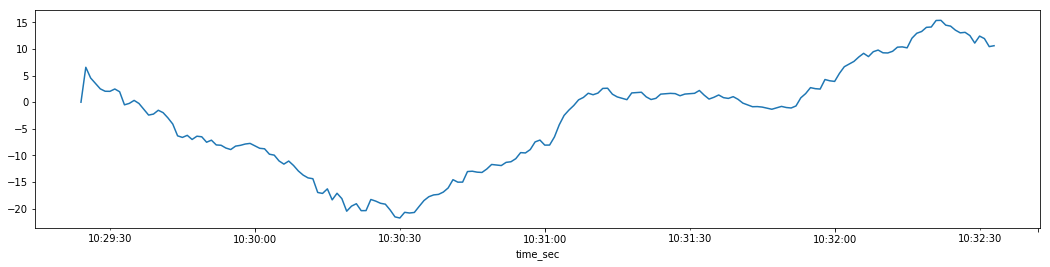

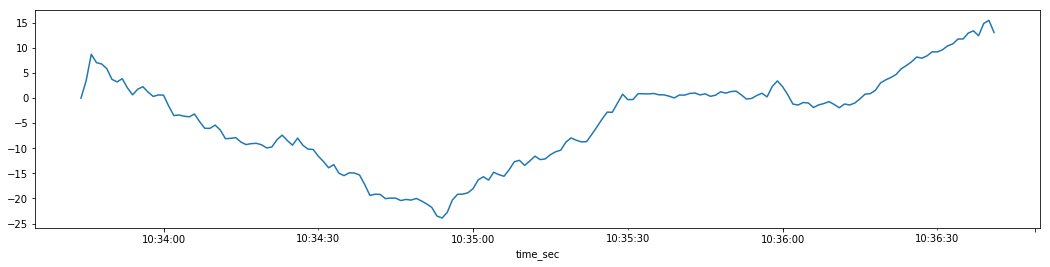

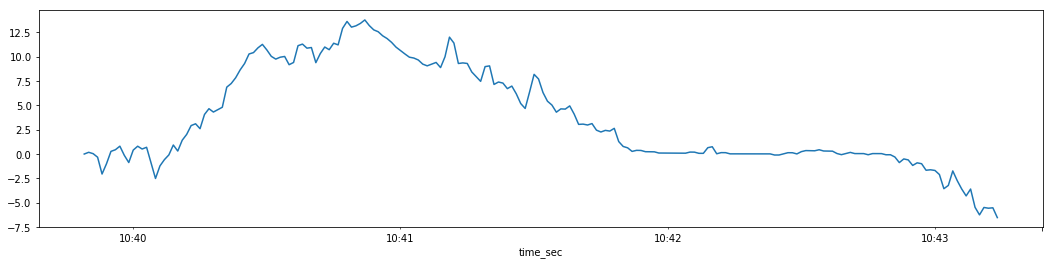

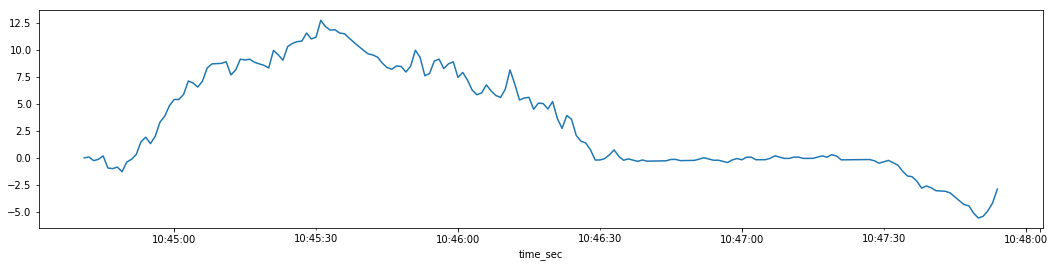

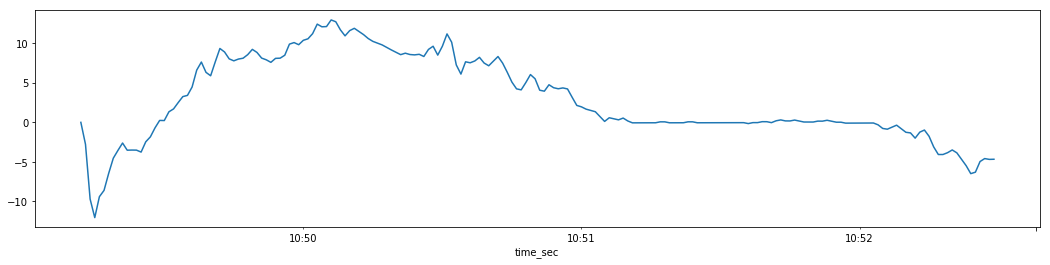

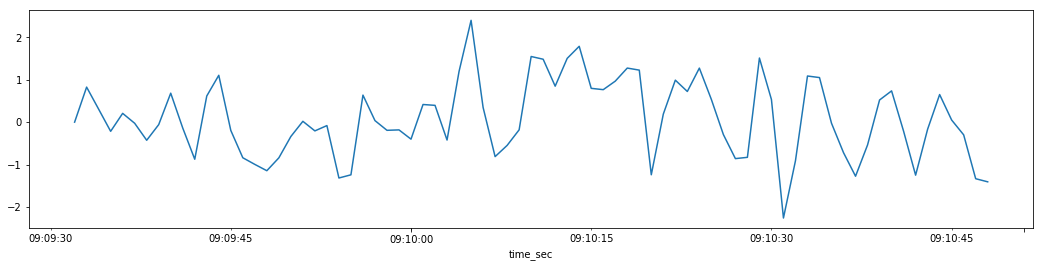

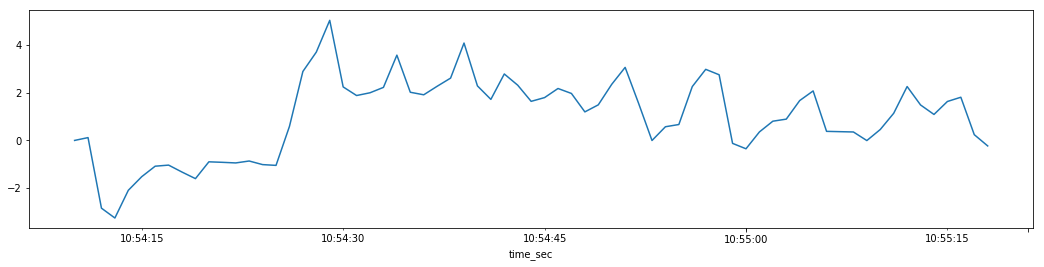

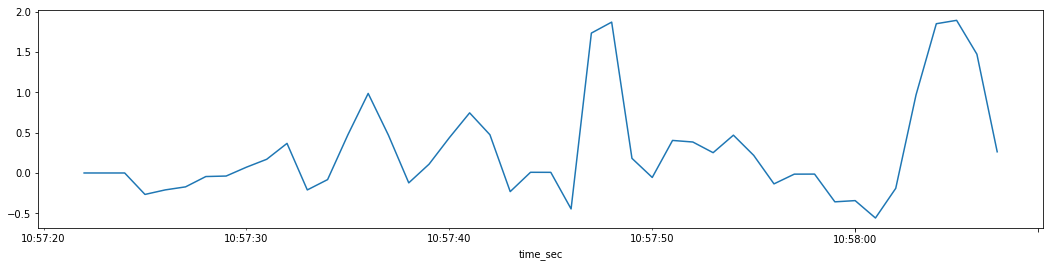

In [249]:
for df in grouped_list:
    fig,ax = plt.subplots(figsize=(18,4))
    #ax.plot(forward_grouped.consecutive_dec)
    #ax.plot(forward_grouped.consecutive_inc)
    #ax.set_title(sheet)
    
    #(df.Forward['first']-df.Forward['first'].rolling(10).mean()).plot()
    (df.Forward['first']-pd.ewma(df.Forward['first'], halflife=24)).plot()
    plt.show()

/home/gidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


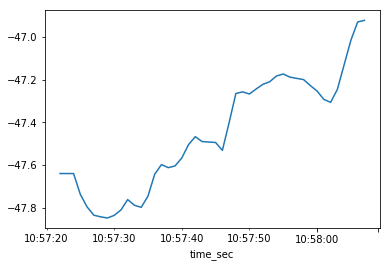

In [246]:
 pd.ewma(df.Forward['first'], halflife=12)

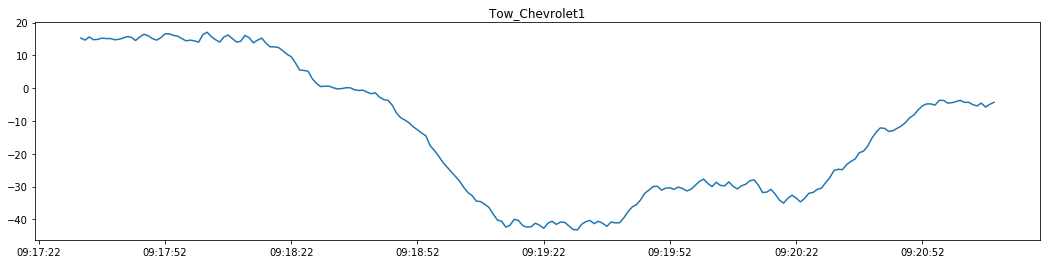

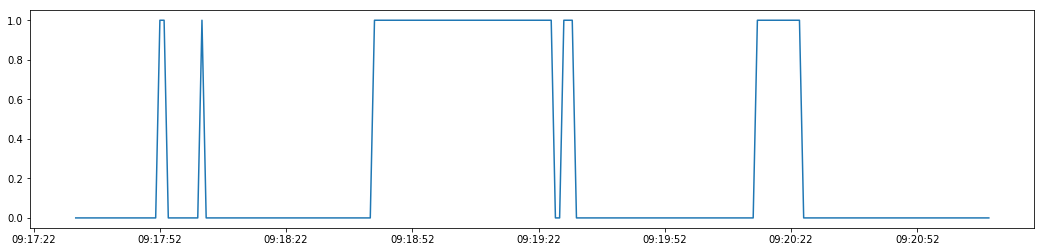

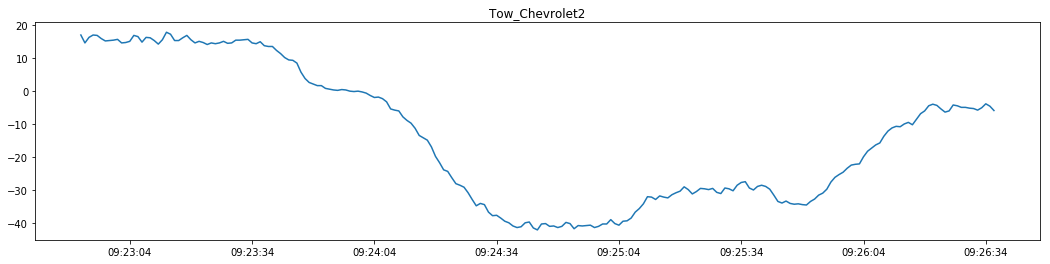

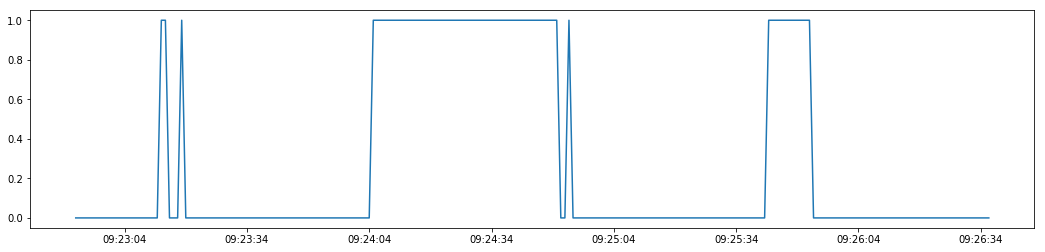

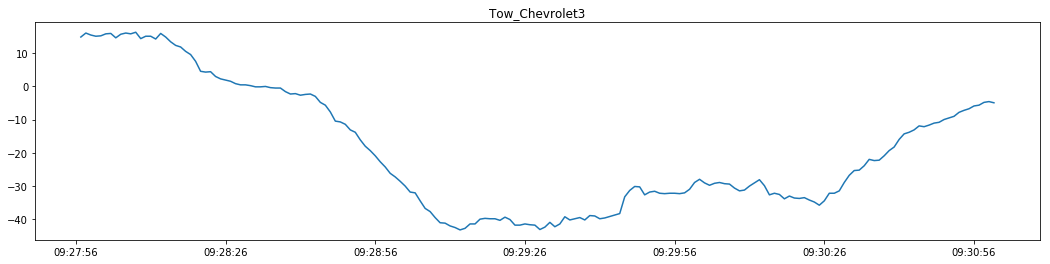

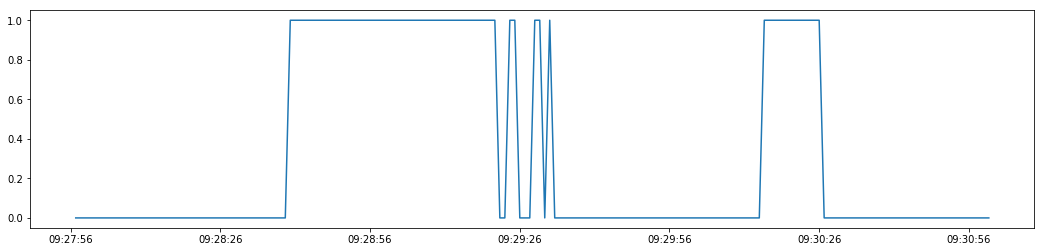

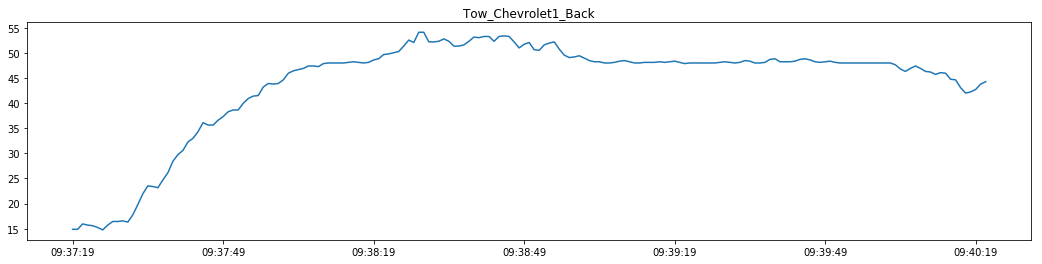

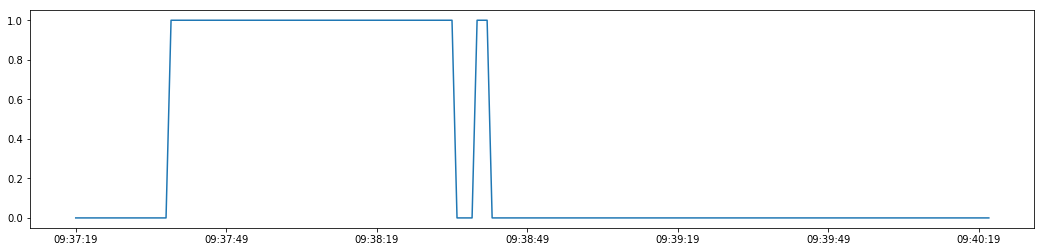

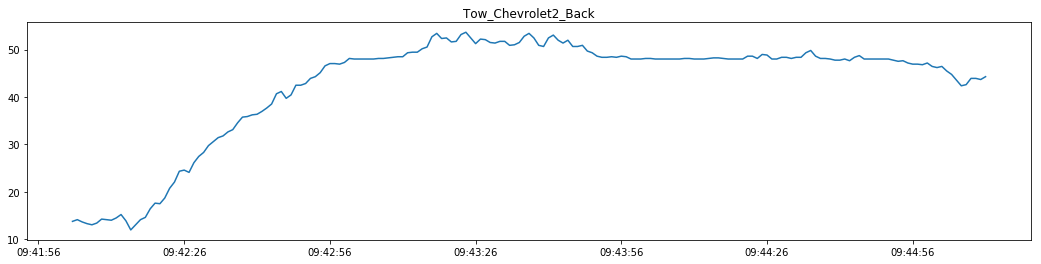

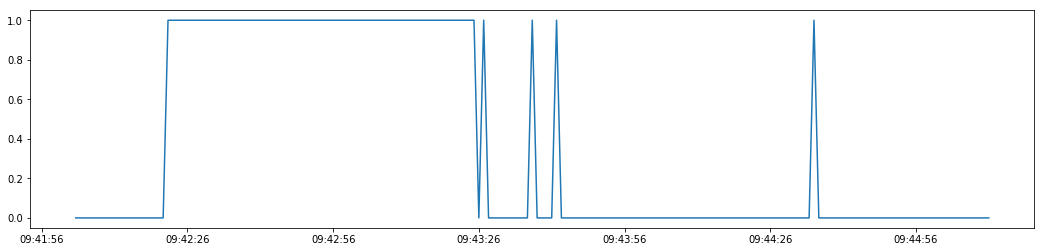

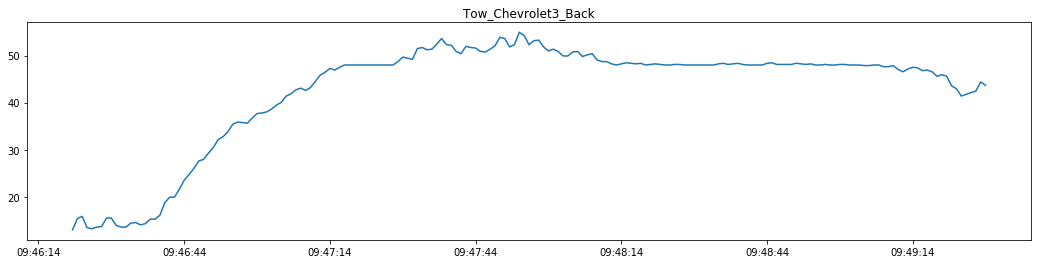

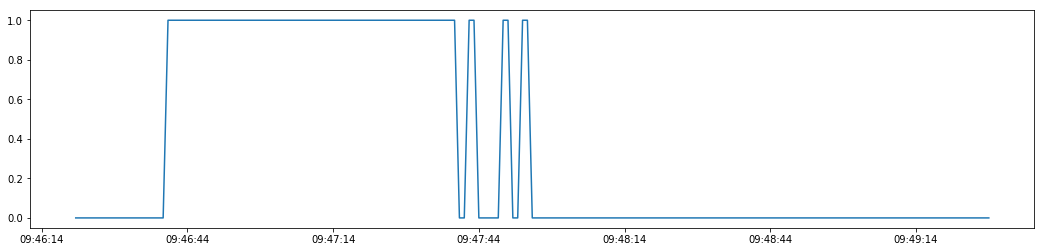

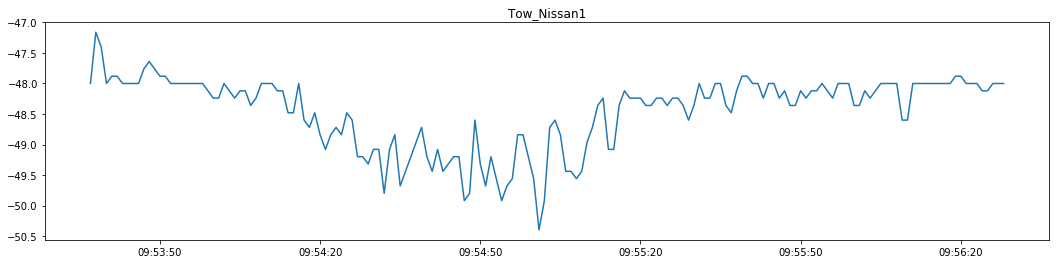

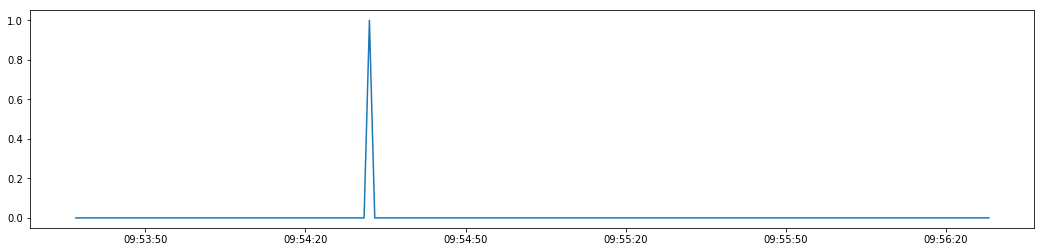

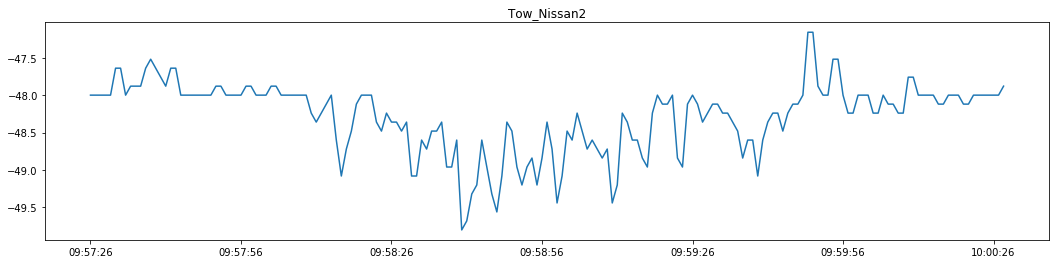

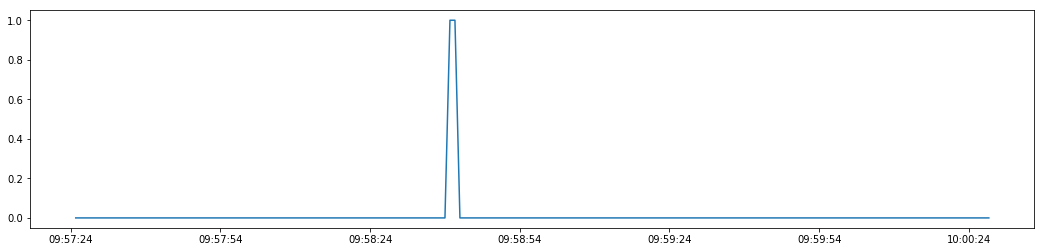

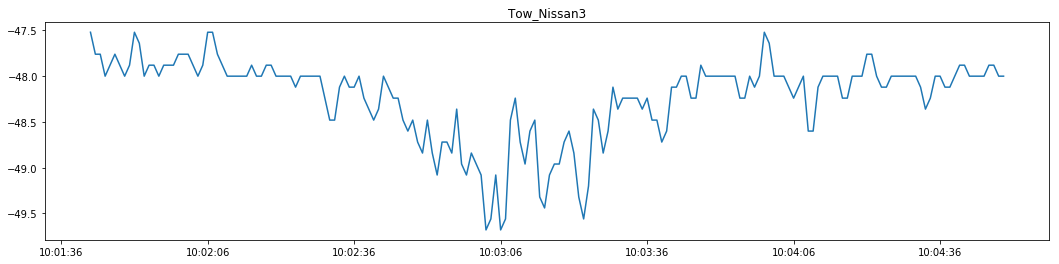

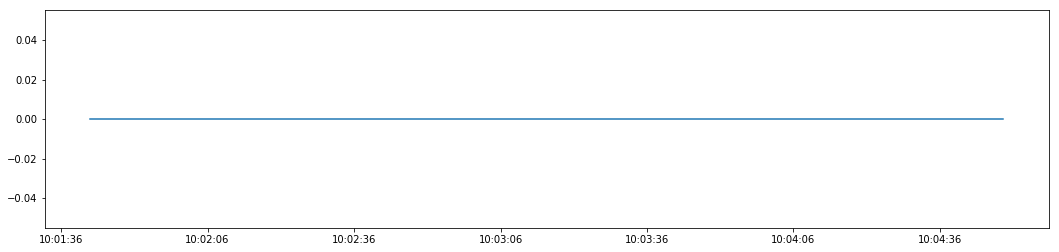

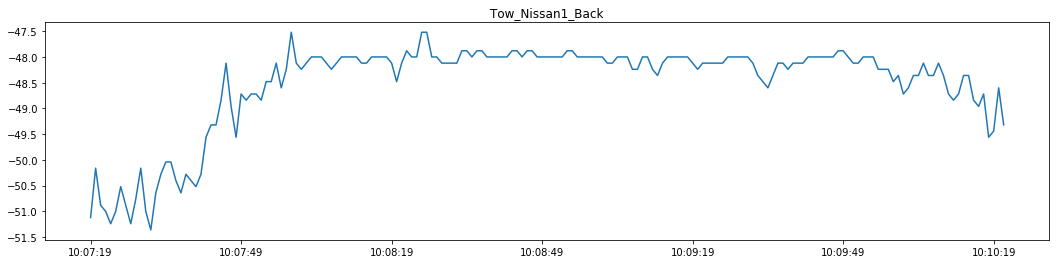

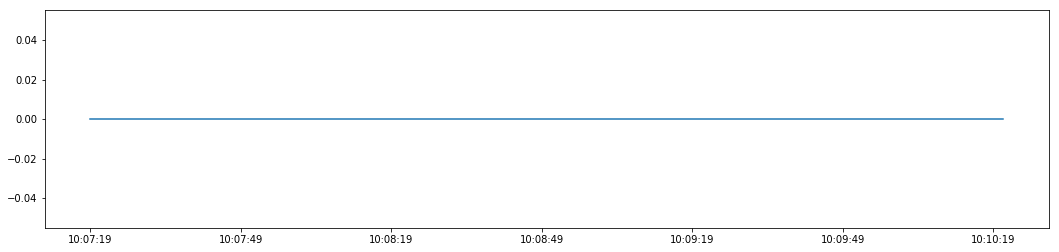

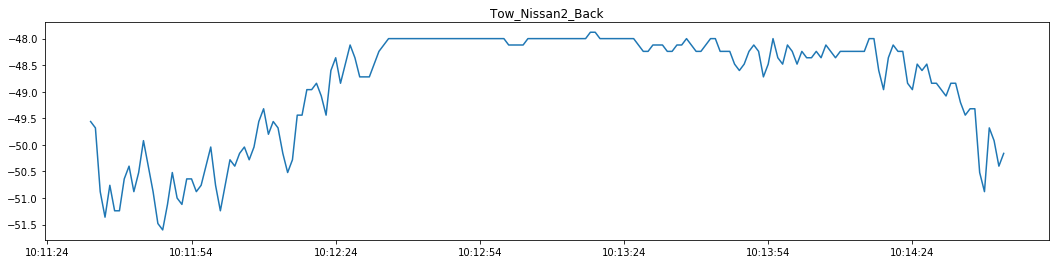

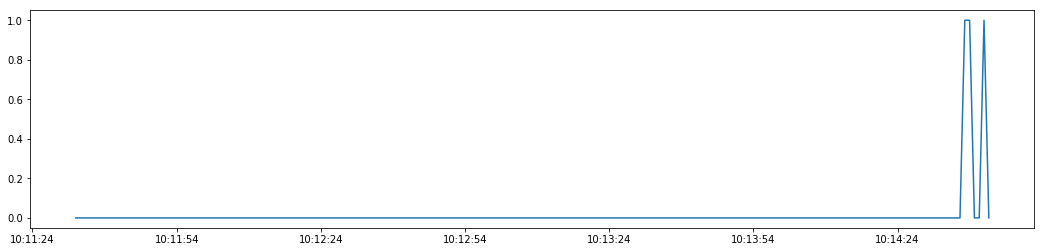

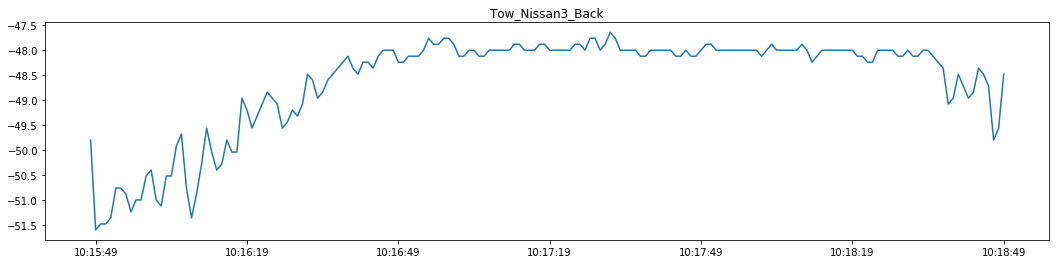

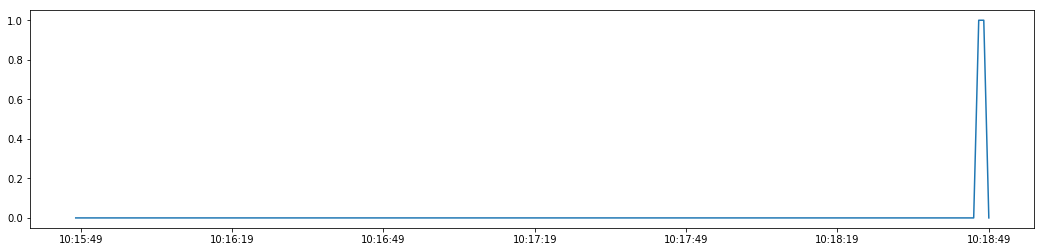

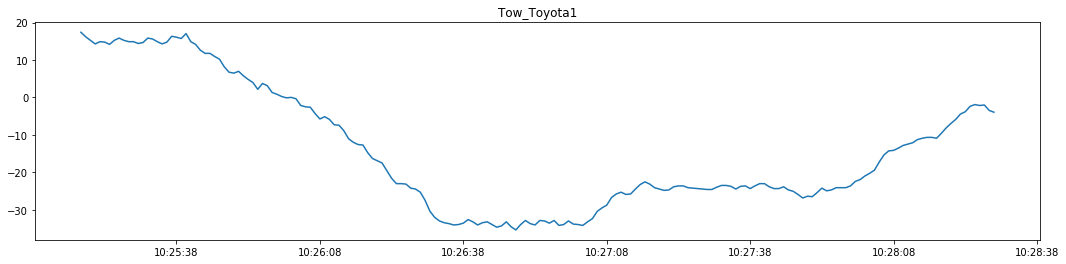

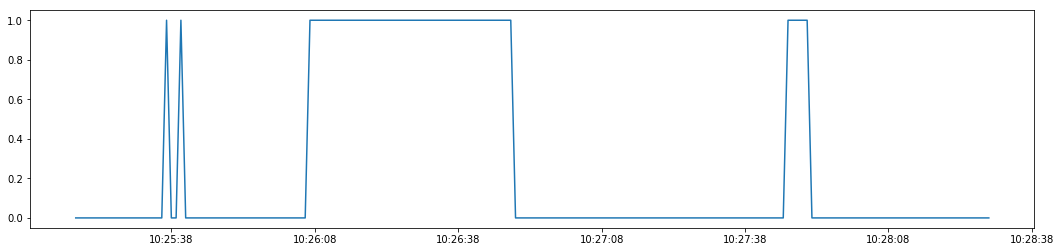

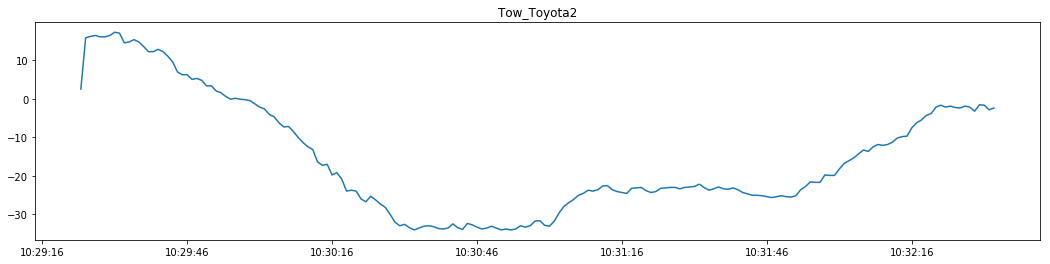

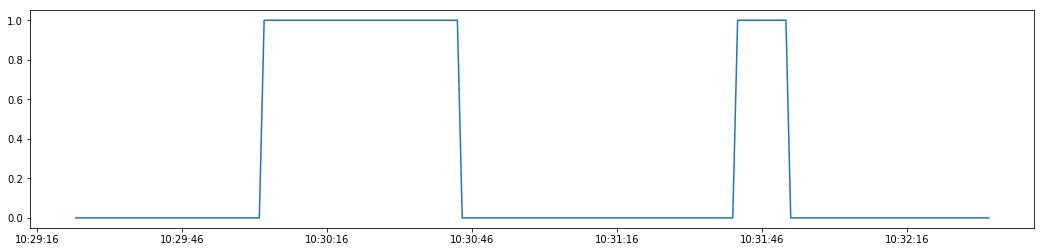

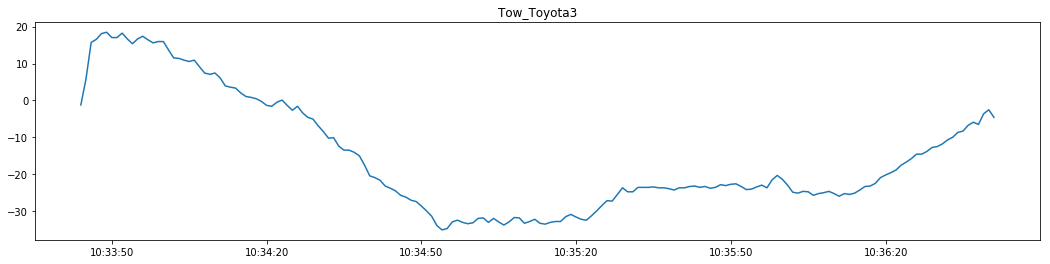

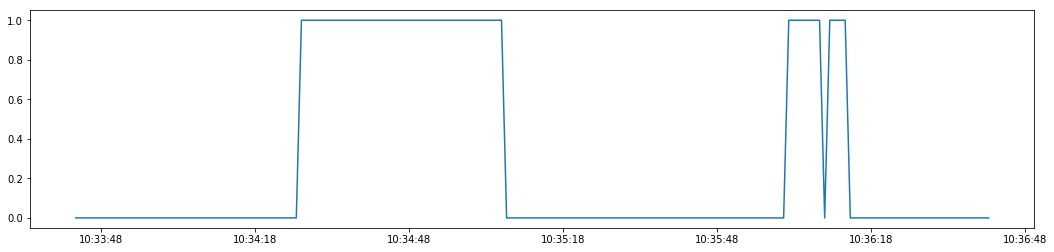

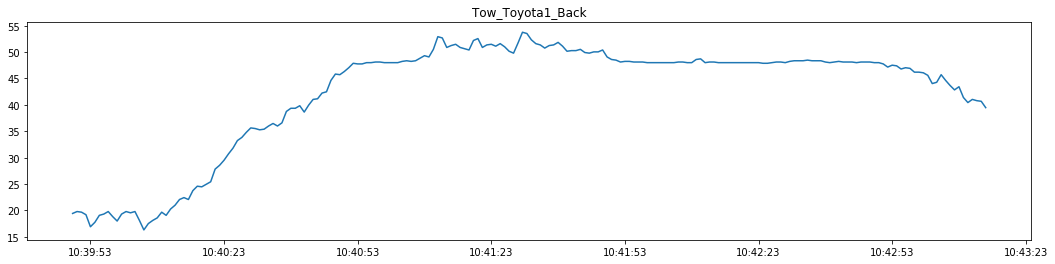

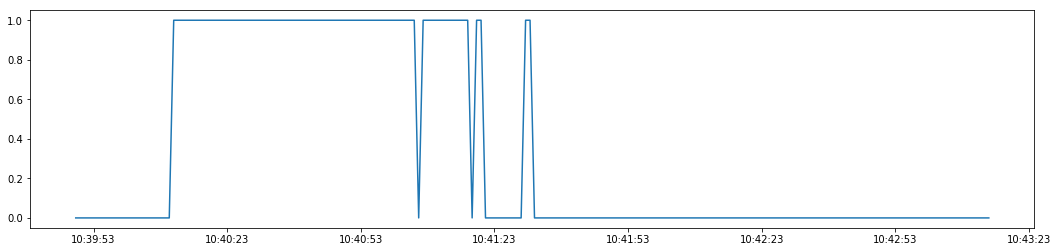

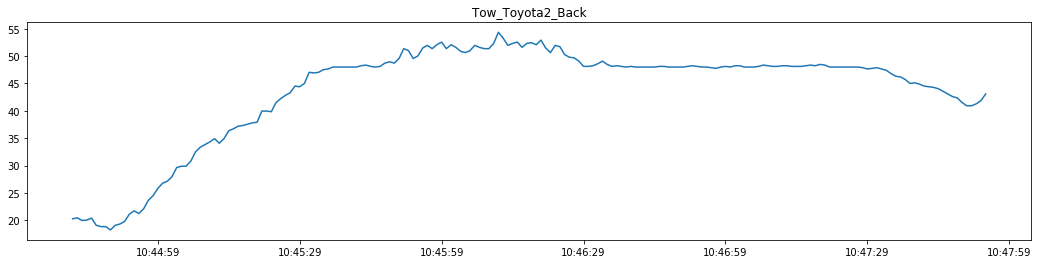

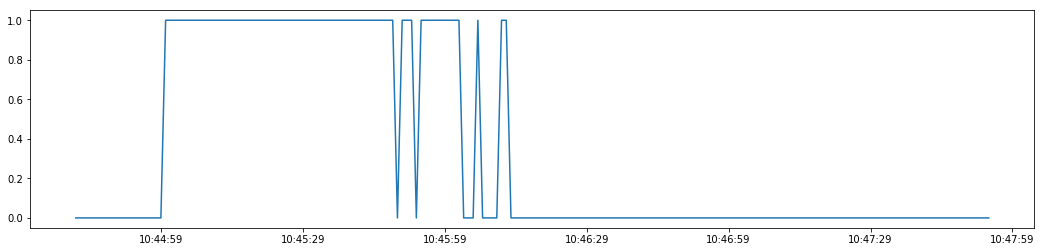

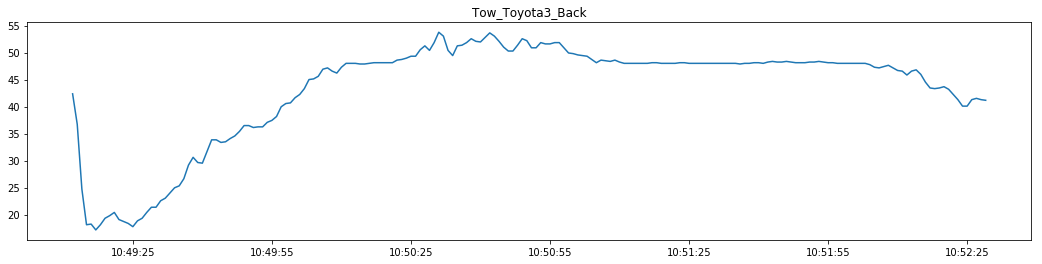

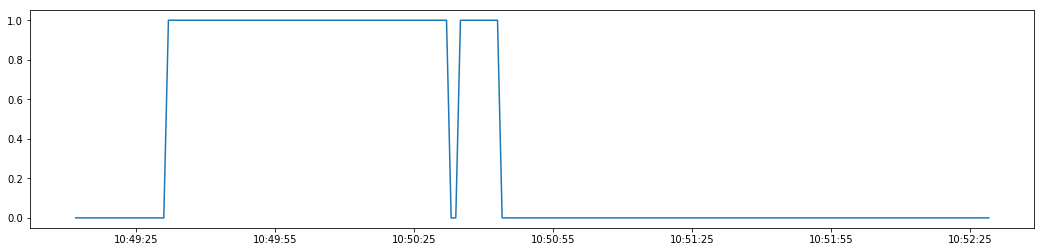

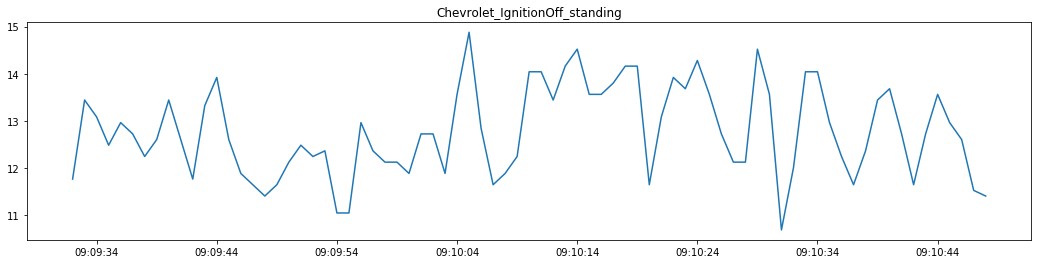

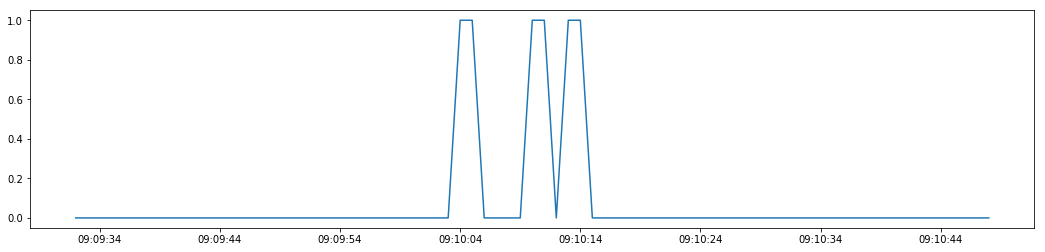

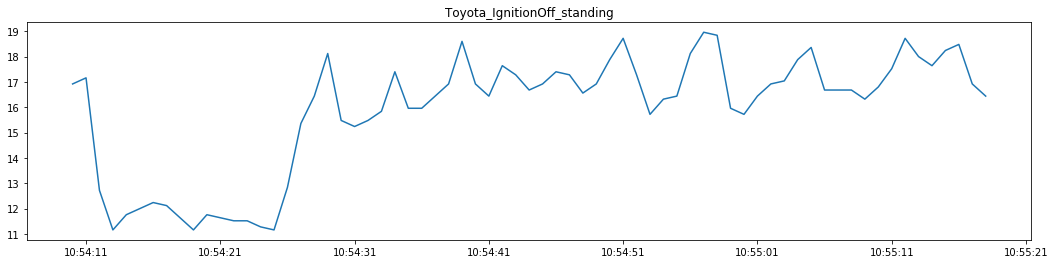

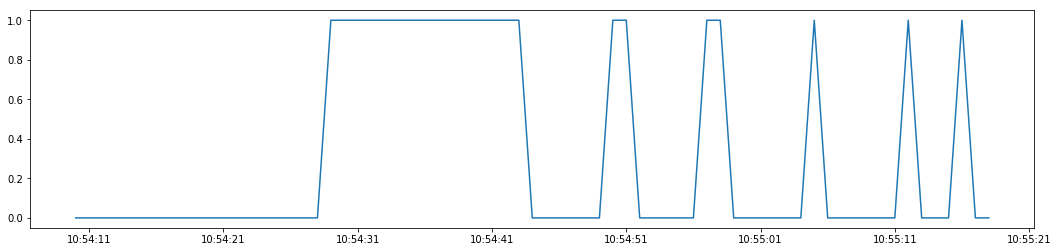

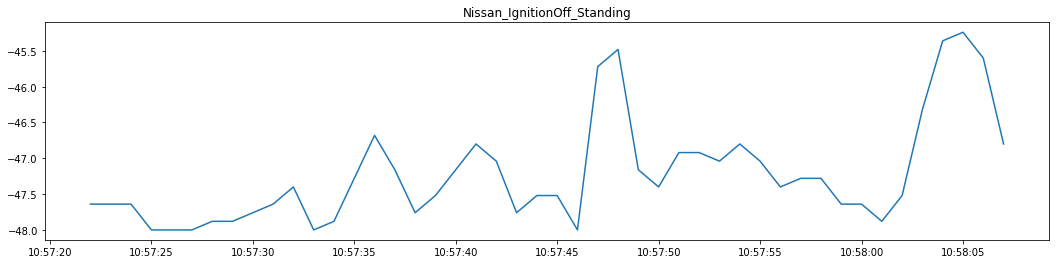

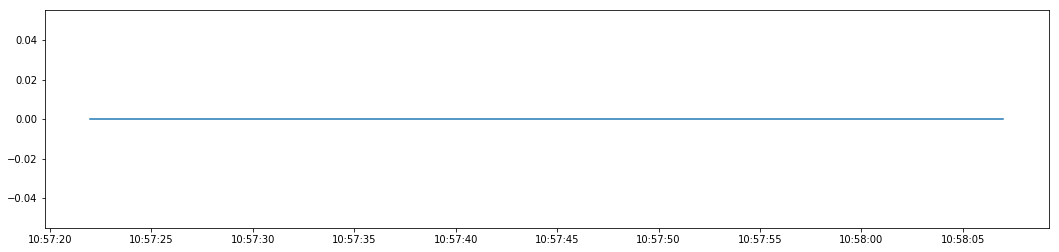

In [269]:
# some kind of groupings
grouped_list=[]
for sheet in list(big_df.sheet.unique()):
    forward_rolling = pd.DataFrame(big_df[big_df.sheet==sheet].Forward.rolling(100).mean()) # 100RollingMean
    forward_rolling['time_sec'] = forward_rolling.index.round('s')
    forward_grouped = forward_rolling.groupby('time_sec').agg({'Forward':['first','last']})

    declines =pd.Series([ i[1].Forward['first']>i[1].Forward['last']+1 for i in forward_grouped.iterrows() ])
    increases =pd.Series([ i[1].Forward['first']<i[1].Forward['last']-1 for i in forward_grouped.iterrows() ])

    forward_grouped['consecutive_dec']=list(declines * (declines.groupby((declines != declines.shift()).cumsum()).cumcount() + 1))
    forward_grouped['consecutive_inc']=list(increases * (increases.groupby((increases != increases.shift()).cumsum()).cumcount() + 1))
    
    fig,ax = plt.subplots(figsize=(18,4))
    ax.plot(forward_grouped.Forward['first'])
    #ax.plot(forward_grouped.consecutive_inc)
    ax.set_title(sheet)
    
    #ax.plot(forward_grouped.Forward)
    #ax.plot(forward_grouped.Forward[::5],marker='.', linestyle='None', markersize = 10.0)
    
    grouped_list.append(forward_grouped)
    
    consec=0
    j=forward_grouped.Forward[::5]['first'][0]
#     for i in forward_grouped.Forward[::5]['first']:
#         if i+0.5<j:
#             consec+=1
#         else:
#             consec=0
#         print(consec)
#         j=i

    # print uptrends
    fig,ax = plt.subplots(figsize=(18,4))
    mean = forward_grouped.Forward['first'].rolling(20).mean()
    std = forward_grouped.Forward['first'].rolling(20).std()
    ax.plot(np.abs(forward_grouped.Forward['first'])>np.abs(mean)+1)
    #print((np.abs(forward_grouped.Forward['first'])>np.abs(mean)+np.abs(std)))
    plt.show()

In [232]:
def consecutive_move(data):
    decreases=[pred < current for current,pred in zip(data,[data[0]]+data[:-1]) ]
    increases=[pred > current for current,pred in zip(data,[data[0]]+data[:-1]) ]
    consec_decreases = decreases * (decreases.groupby((decreases != decreases.shift()).cumsum()).cumcount() + 1)
    consec_increases = increases * (increases.groupby((increases != increases.shift()).cumsum()).cumcount() + 1)
    return consec_decreases

In [233]:
consecutive_move(list(forward_grouped.Forward[::5]['first']))

AttributeError: 'list' object has no attribute 'groupby'

In [236]:
consec=0
j=grouped_list[0].Forward[::5]['first'][0]
for i in grouped_list[0].Forward[::5]['first']:
    if i<j:
        consec+=1
    else:
        consec=0
    print(consec)
    j=i

0
0
0
0
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
0
1
0
0
0
1
0
0
0
1
2
0
0
0
0
0
0
0
1
2


In [171]:
declines =pd.Series([ i[1].Forward['first']>i[1].Forward['last']+1 for i in forward_grouped.iterrows() ])
increases =pd.Series([ i[1].Forward['first']<i[1].Forward['last']-1 for i in forward_grouped.iterrows() ])

In [172]:
forward_grouped['declines']=declines[0]
forward_grouped['increases']=increases[0]



In [174]:
forward_grouped['consecutive_dec']=list(declines * (declines.groupby((declines != declines.shift()).cumsum()).cumcount() + 1))
forward_grouped['consecutive_inc']=list(increases * (increases.groupby((increases != increases.shift()).cumsum()).cumcount() + 1))

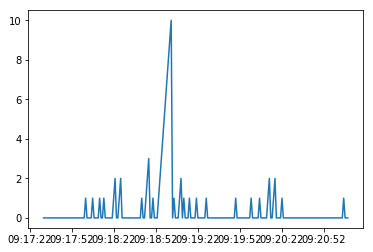

In [175]:
plt.plot(forward_grouped.consecutive_dec)

In [28]:
a=big_df[big_df.sheet=='Tow_Chevrolet1'].Forward.rolling(100).mean()

## Winning feature extraction

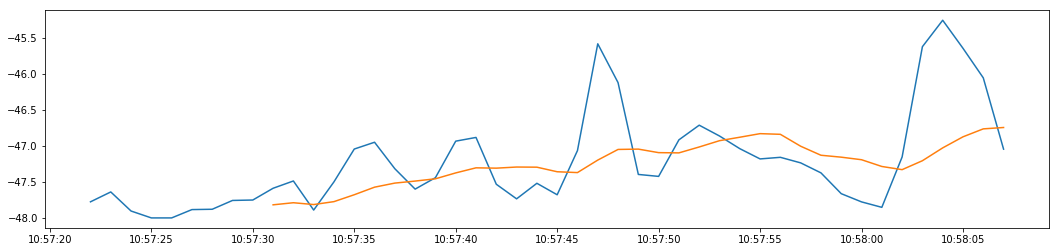

In [32]:
fig,ax = plt.subplots(figsize=(18,4))
ax.plot(pd.DataFrame(big_df[big_df.sheet==sheet].Forward))
ax.plot(forward_grouped.Forward)
ax.plot(mean)

37 Tow_Chevrolet1
38 Tow_Chevrolet2
31 Tow_Chevrolet3
41 Tow_Chevrolet1_Back
43 Tow_Chevrolet2_Back
41 Tow_Chevrolet3_Back
0 Tow_Nissan1
0 Tow_Nissan2
0 Tow_Nissan3
0 Tow_Nissan1_Back
1 Tow_Nissan2_Back
0 Tow_Nissan3_Back
35 Tow_Toyota1
35 Tow_Toyota2
33 Tow_Toyota3
47 Tow_Toyota1_Back
46 Tow_Toyota2_Back
25 Tow_Toyota3_Back
2 Chevrolet_IgnitionOff_standing
6 Toyota_IgnitionOff_standing
0 Nissan_IgnitionOff_Standing


/home/gidi/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


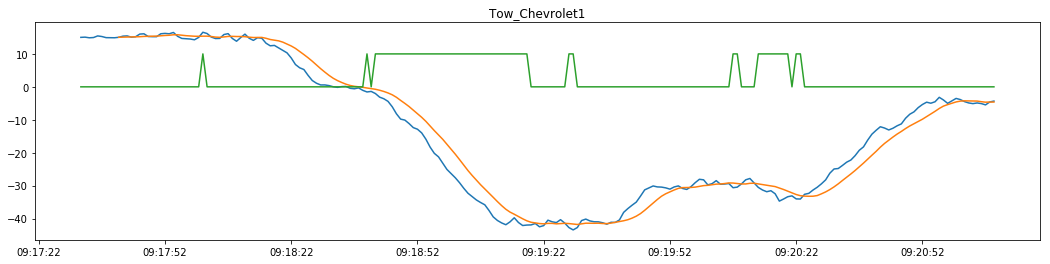

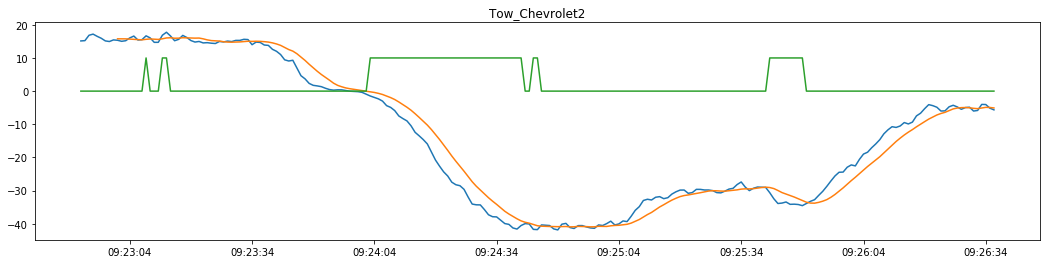

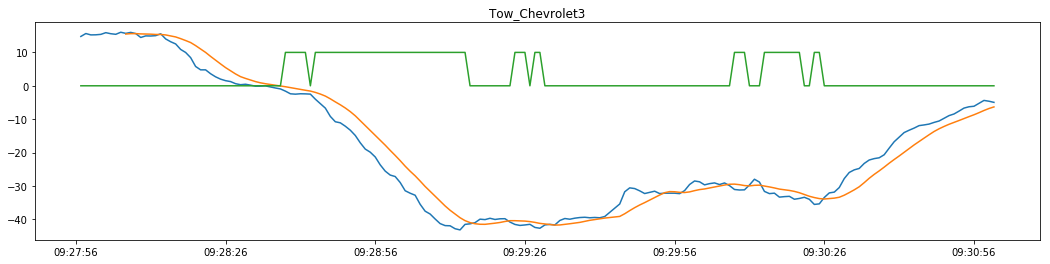

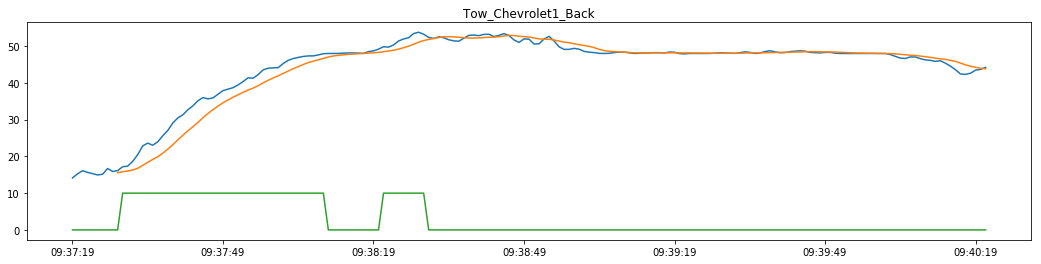

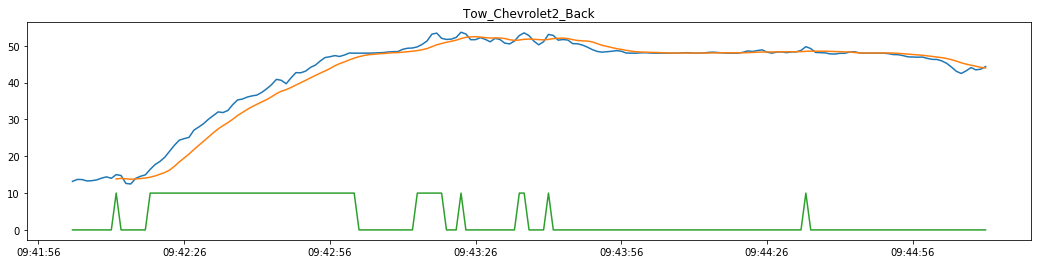

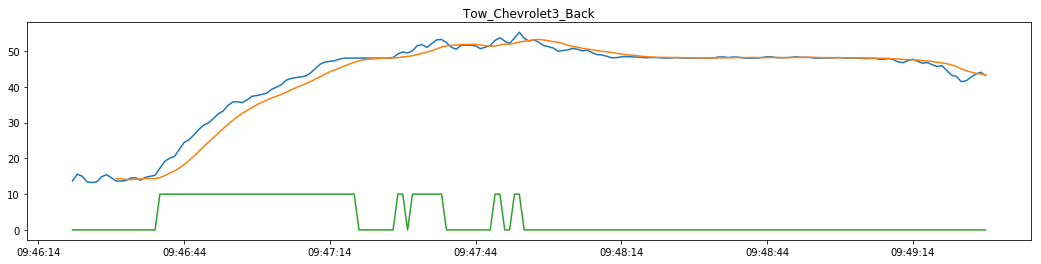

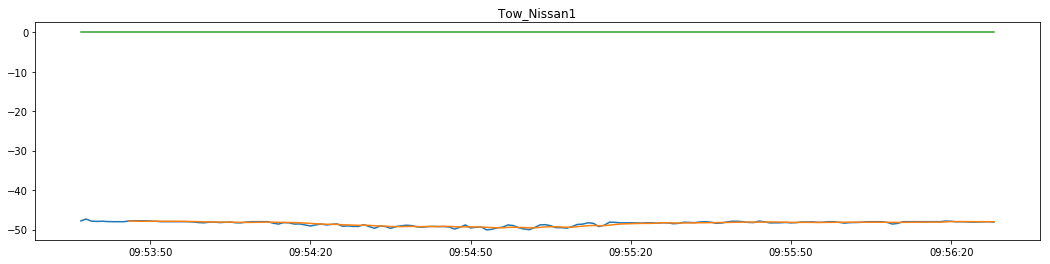

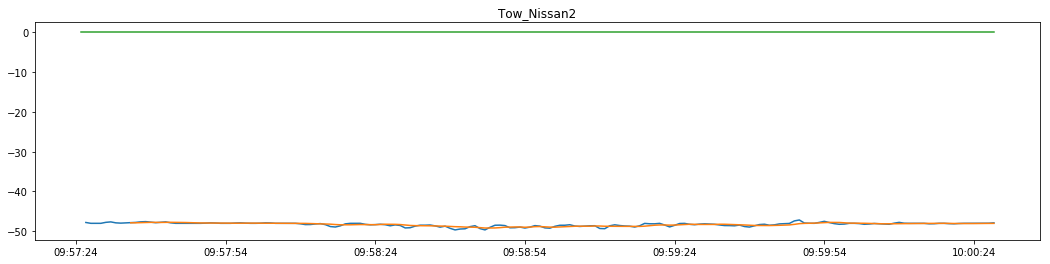

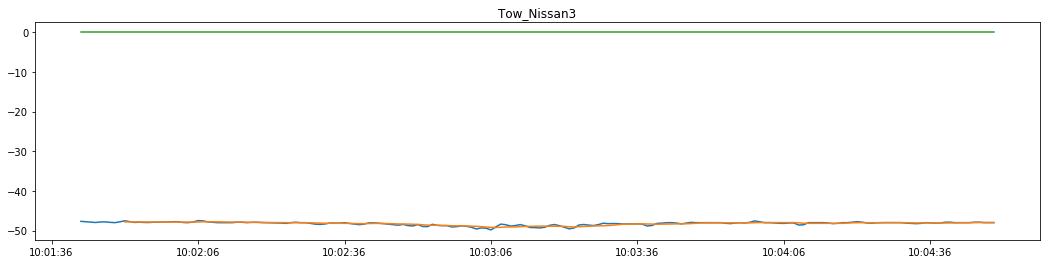

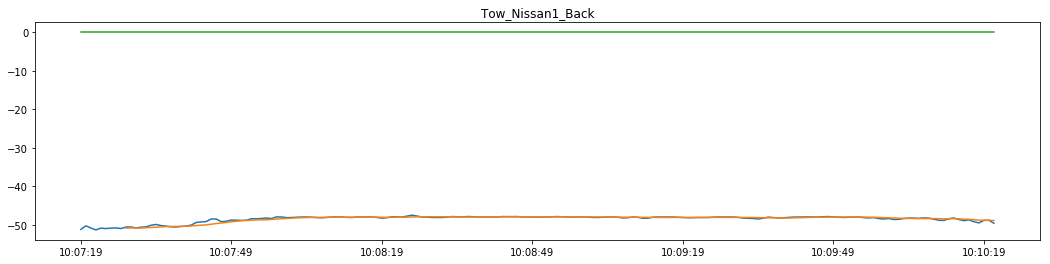

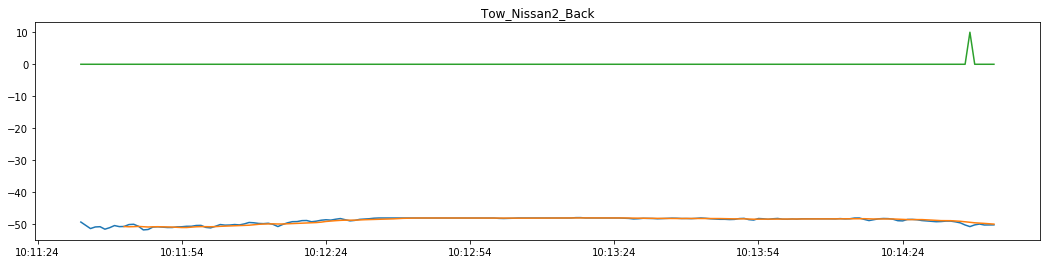

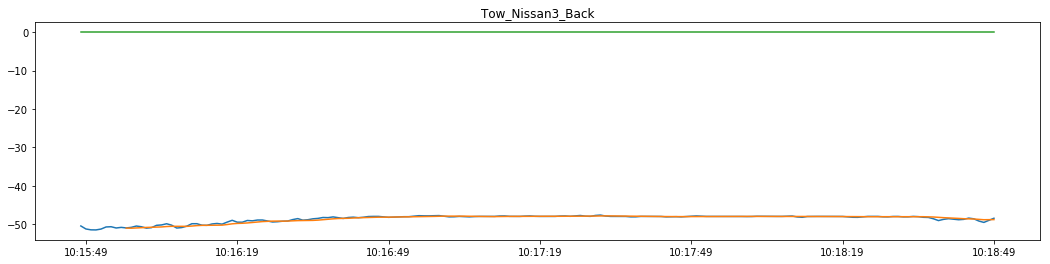

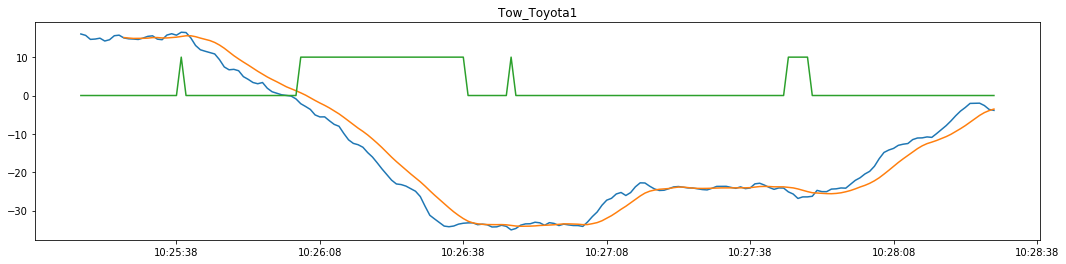

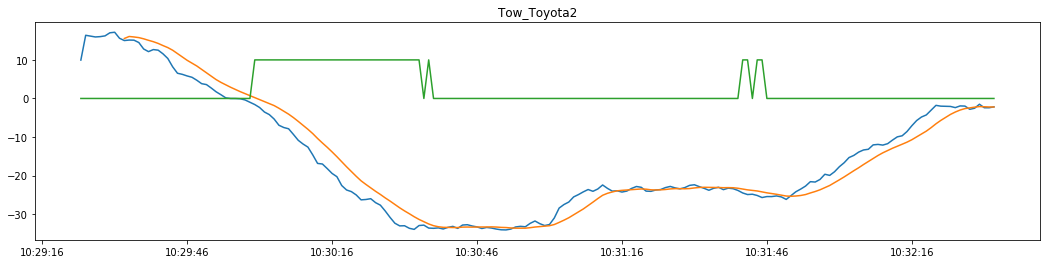

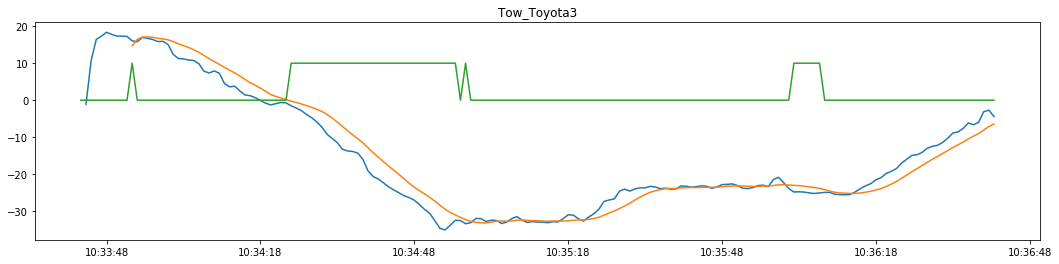

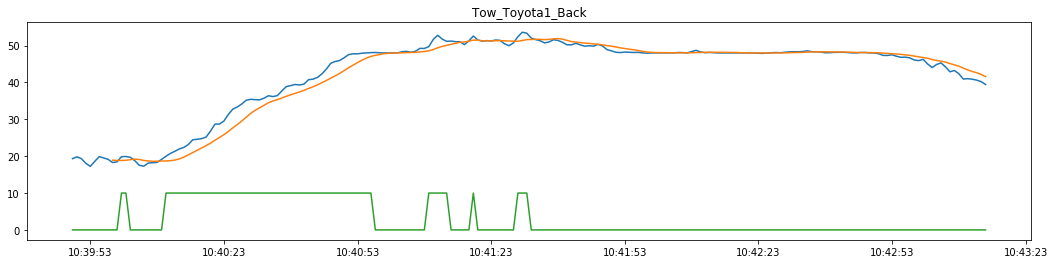

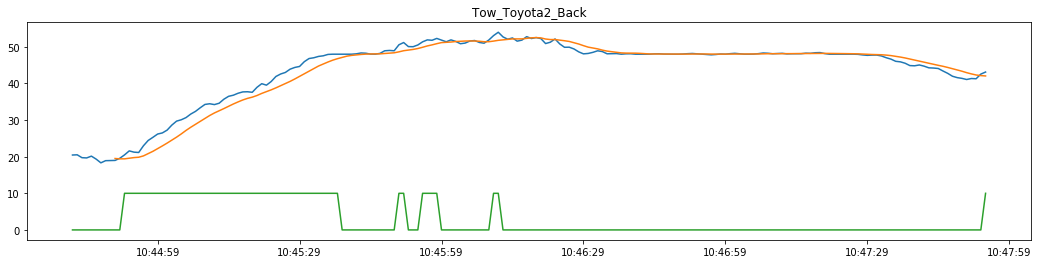

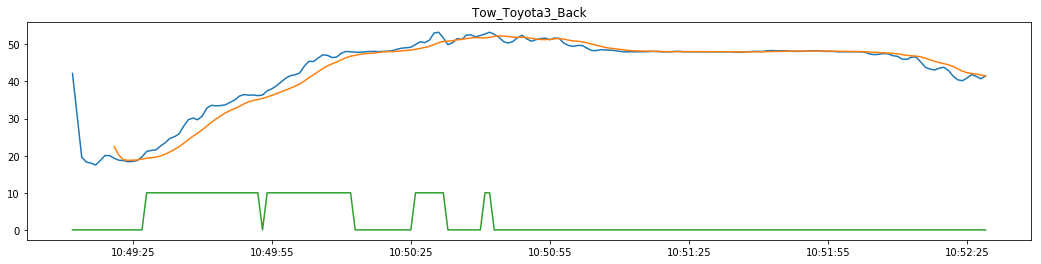

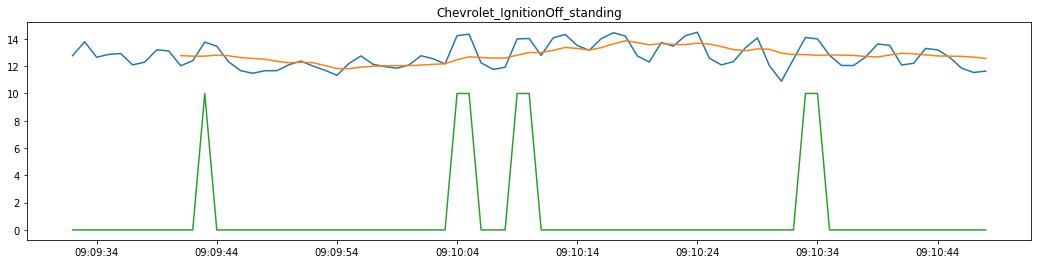

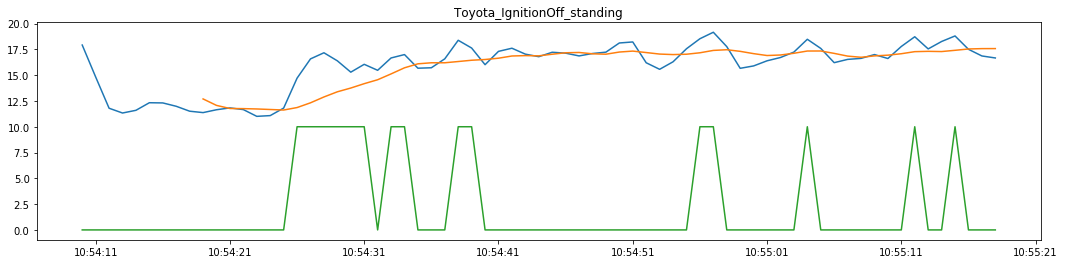

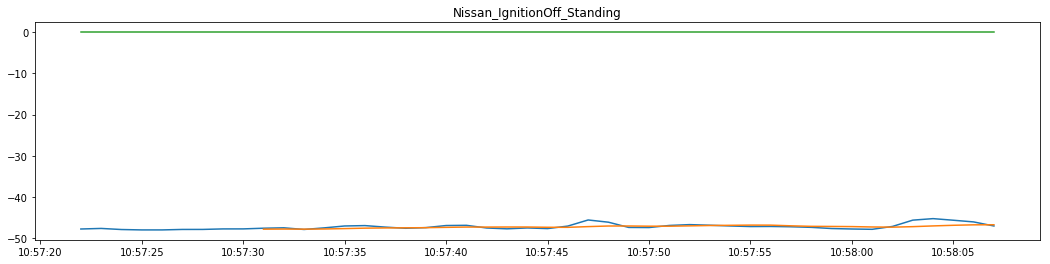

In [36]:
# This is the solution
first_rolling=100
second_rolling=10
consec=40

#
# the feature is how many consecutive times the FIRST moving average crosses the second moving average
#

for sheet in list(big_df.sheet.unique()): 
    # rolling mean (first level)
    forward_rolling = pd.DataFrame(big_df[big_df.sheet==sheet].Forward.rolling(first_rolling).mean())
    forward_rolling['time_sec'] = forward_rolling.index.round('s')
    
    forward_grouped = forward_rolling.groupby('time_sec').mean()
    fig,ax = plt.subplots(figsize=(18,4))

    #ax.plot(pd.DataFrame(big_df[big_df.sheet==sheet].Forward))
    ax.plot(forward_grouped.Forward)
    
    ax.set_title(sheet)
    mean = forward_grouped.Forward.rolling(second_rolling).mean()
    trend = pd.DataFrame(np.abs(forward_grouped.Forward)>np.abs(mean)+1).Forward
    ax.plot(mean)
    ax.plot(trend*10)
              
    consec_decreases = trend * (trend.groupby((trend != trend.shift()).cumsum()).cumcount() + 1)
    print(max(consec_decreases),sheet)

## Strange pattern recognition library

In [7]:
cd ~/cloned_libs/time-series-pattern-recognition/

/home/gidi/cloned_libs/time-series-pattern-recognition


In [9]:
import operator
from src.generated.generated import *

In [10]:
data = [4,3,5,5,2,1,1,3,3,4,6,6,3,1,3,3]
min_min_increasing_sequence(data)

1

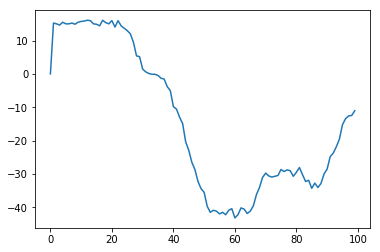

In [43]:

plt.plot(data)

In [12]:
from src.generated import generated

In [12]:
data=[1,1,1]

In [30]:
for i in range(8,len(dir(generated))):
    print(dir(generated)[i],eval(dir(generated)[i])(a))

max_max_decreasing 17.16
max_max_decreasing_sequence 17.16
max_max_decreasing_terrace 16.92
max_max_dip_on_increasing_sequence -6.96
max_max_gorge 17.04
max_max_increasing 17.16
max_max_increasing_sequence 17.16
max_max_increasing_terrace 16.8
max_max_inflexion 17.16
max_max_peak 17.16
max_max_plain 16.68
max_max_plateau 17.16
max_max_proper_plain 16.68
max_max_proper_plateau 17.16
max_max_steady 17.16
max_max_steady_sequence 17.16
max_max_strictly_decreasing_sequence 17.16
max_max_strictly_increasing_sequence 17.16
max_max_summit 16.92
max_max_valley 17.04
max_max_zigzag 15.72
max_min_bump_on_decreasing_sequence -3.84
max_min_decreasing 17.04
max_min_decreasing_sequence 16.68
max_min_decreasing_terrace 16.92
max_min_dip_on_increasing_sequence -7.08
max_min_gorge 16.68
max_min_increasing 17.04
max_min_increasing_sequence 16.68
max_min_increasing_terrace 16.8
max_min_inflexion 16.8
max_min_peak 16.8
max_min_plain 16.68
max_min_plateau 17.16
max_min_proper_plain 16.68
max_min_proper_plat

TypeError: '>' not supported between instances of 'tuple' and 'int'